In [1]:
# Import our dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import datetime
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

In [2]:
# Loading the dataset from the resources folder

sqf_2020_df = pd.read_csv(Path('Resources/sqf-2020.csv'))
sqf_2019_df = pd.read_csv(Path('Resources/sqf-2019.csv'))
sqf_2018_df = pd.read_csv(Path('Resources/sqf-2018.csv'))
sqf_2017_df = pd.read_csv(Path('Resources/sqf-2017.csv'))

dataFrame_list = [sqf_2019_df, sqf_2018_df, sqf_2017_df]
merge_df = pd.concat(dataFrame_list)
merge_df

,STOP_ID_ANONY,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,STOP_FRISK_ID,Stop Frisk Time,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,STOP_LOCATION_PREMISES_NAME
0,1.0,1/2/2019,14:30:00,2019.0,January,Wednesday,Based on C/W on Scene,APP,POM,1,...,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
1,2.0,1/8/2019,2:30:00,2019.0,January,Tuesday,Based on Self Initiated,APP,POM,1,...,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
2,3.0,1/12/2019,16:54:00,2019.0,January,Saturday,Based on Radio Run,APP,POM,1,...,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
3,4.0,1/14/2019,21:21:00,2019.0,January,Monday,Based on Radio Run,APP,POM,1,...,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
4,5.0,1/15/2019,18:50:00,2019.0,January,Tuesday,Based on Radio Run,APP,POM,1,...,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,NaN,2017-12-01,12:20:00 PM,2017.0,December,Friday,Based on Radio Run,APP,POM,71,...,STERLING STREET,#NULL!,#NULL!,(null),(nul,(null),2.018071e+12,NaN,Y,(null)
11625,NaN,2017-12-20,4:10:00 AM,2017.0,December,Wednesday,Based on Self Initiated,APP,POM,425,...,JAMAICA AVENUE,1016693.00,187436.00,(null),PBBN,BROOKLYN,2.018075e+12,NaN,Y,(null)
11626,NaN,2017-10-07,11:45:00 PM,2017.0,October,Saturday,Based on Self Initiated,APP,POM,106,...,LINDEN BOULEVARD,#NULL!,#NULL!,(null),(nul,(null),2.018106e+12,NaN,Y,(null)
11627,NaN,2017-12-26,3:25:00 PM,2017.0,December,Tuesday,Based on Self Initiated,APP,POM,593,...,YORK AVENUE,#NULL!,#NULL!,(null),(nul,(null),2.018120e+12,NaN,Y,(null)


In [3]:
sqf_2020_df

,STOP_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/1/2020,1:12:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
1,2,1/1/2020,1:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
2,3,1/1/2020,1:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
3,4,1/1/2020,10:18:00,2020,January,Wednesday,Based on Radio Run,APP,POM,75,...,75,D,(null),LINDEN BLVD && SHEPHERD AVE,LINDEN BLVD,1018441,181412,11208,PBBN,BROOKLYN
4,5,1/1/2020,8:45:00,2020,January,Wednesday,Based on Radio Run,APP,POM,78,...,78,B,(null),481 5 AVE,5 AVE,987763,182543,11215,PBBS,BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,9540,12/31/2020,0:20:00,2020,December,Thursday,Based on Radio Run,APP,POM,72,...,72,D,(null),375 57 ST,57 ST,979566,173464,11220,PBBS,BROOKLYN
9540,9541,12/29/2020,17:11:00,2020,December,Tuesday,Based on Radio Run,APP,CPT,78,...,71,B,(null),749 CROWN ST,CROWN ST,1002918,181721,11213,PBBS,BROOKLYN
9541,9542,12/12/2020,1:45:00,2020,December,Saturday,Based on Self Initiated,APP,POM,75,...,73,C,(null),424 MOTHER GASTON BLVD,MOTHER GASTON BLVD,1010145,182898,11212,PBBN,BROOKLYN
9542,9543,12/25/2020,15:45:00,2020,December,Friday,Based on Radio Run,APP,POM,73,...,73,A,(null),BROADWAY && HALSEY ST,BROADWAY,1007368,189362,(null),PBBN,BROOKLYN


In [4]:
merge_df = merge_df.replace('PM','', regex=True)
merge_df = merge_df.replace('AM','', regex=True)
sqf_2020_df = sqf_2020_df.replace('AM','', regex=True)
sqf_2020_df = sqf_2020_df.replace('PM','', regex=True)
merge_df
sqf_2020_df

,STOP_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/1/2020,1:12:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
1,2,1/1/2020,1:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
2,3,1/1/2020,1:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
3,4,1/1/2020,10:18:00,2020,January,Wednesday,Based on Radio Run,APP,POM,75,...,75,D,(null),LINDEN BLVD && SHEPHERD AVE,LINDEN BLVD,1018441,181412,11208,PBBN,BROOKLYN
4,5,1/1/2020,8:45:00,2020,January,Wednesday,Based on Radio Run,APP,POM,78,...,78,B,(null),481 5 AVE,5 AVE,987763,182543,11215,PBBS,BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,9540,12/31/2020,0:20:00,2020,December,Thursday,Based on Radio Run,APP,POM,72,...,72,D,(null),375 57 ST,57 ST,979566,173464,11220,PBBS,BROOKLYN
9540,9541,12/29/2020,17:11:00,2020,December,Tuesday,Based on Radio Run,APP,CPT,78,...,71,B,(null),749 CROWN ST,CROWN ST,1002918,181721,11213,PBBS,BROOKLYN
9541,9542,12/12/2020,1:45:00,2020,December,Saturday,Based on Self Initiated,APP,POM,75,...,73,C,(null),424 MOTHER GASTON BLVD,MOTHER GASTON BLVD,1010145,182898,11212,PBBN,BROOKLYN
9542,9543,12/25/2020,15:45:00,2020,December,Friday,Based on Radio Run,APP,POM,73,...,73,A,(null),BROADWAY && HALSEY ST,BROADWAY,1007368,189362,(null),PBBN,BROOKLYN


In [5]:
# Find null values
for column in merge_df.columns:
    print(f"Column {column} has {merge_df[column].isnull().sum()} null values")


Column STOP_ID_ANONY has 22637 null values
Column STOP_FRISK_DATE has 0 null values
Column STOP_FRISK_TIME has 11013 null values
Column YEAR2 has 0 null values
Column MONTH2 has 0 null values
Column DAY2 has 0 null values
Column STOP_WAS_INITIATED has 1 null values
Column RECORD_STATUS_CODE has 0 null values
Column ISSUING_OFFICER_RANK has 0 null values
Column ISSUING_OFFICER_COMMAND_CODE has 0 null values
Column SUPERVISING_OFFICER_RANK has 0 null values
Column SUPERVISING_OFFICER_COMMAND_CODE has 0 null values
Column LOCATION_IN_OUT_CODE has 0 null values
Column JURISDICTION_CODE has 0 null values
Column JURISDICTION_DESCRIPTION has 0 null values
Column OBSERVED_DURATION_MINUTES has 0 null values
Column SUSPECTED_CRIME_DESCRIPTION has 0 null values
Column STOP_DURATION_MINUTES has 0 null values
Column OFFICER_EXPLAINED_STOP_FLAG has 0 null values
Column OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION has 8 null values
Column OTHER_PERSON_STOPPED_FLAG has 1 null values
Column SUSPECT_ARRESTED_

In [6]:
# Function checking for missing values
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [7]:
missing_values_table(merge_df)

Your selected dataframe has 87 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
Stop Frisk Time,25090,69.5
STOP_ID_ANONY,22637,62.7
CONSENT_GIVEN_FLG,22637,62.7
ASK_FOR_CONSENT_FLG,22637,62.7
SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,13472,37.3
STOP_FRISK_ID,13459,37.3
STOP_LOCATION_PREMISES_NAME,13459,37.3
STOP_FRISK_TIME,11013,30.5
SUSPECT_OTHER_DESCRIPTION,2708,7.5
DEMEANOR_OF_PERSON_STOPPED,2346,6.5


In [8]:
merge_df['STOP_LOCATION_APARTMENT'].value_counts()

(null)        34147
LOBBY           145
1                82
2                73
6                61
              ...  
25A               1
VESTBU            1
OPPOSITE          1
16TH FLOOR        1
BROOKL            1
Name: STOP_LOCATION_APARTMENT, Length: 503, dtype: int64

In [9]:
merge_df.dtypes

STOP_ID_ANONY                                                   float64
STOP_FRISK_DATE                                                  object
STOP_FRISK_TIME                                                  object
YEAR2                                                           float64
MONTH2                                                           object
                                                                 ...   
STOP_LOCATION_BORO_NAME                                          object
STOP_FRISK_ID                                                   float64
Stop Frisk Time                                                  object
SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED     object
STOP_LOCATION_PREMISES_NAME                                      object
Length: 87, dtype: object

In [10]:
# Generate our categorical variable lists
float_columns = merge_df.dtypes[merge_df.dtypes == "float"].index.tolist()
len(float_columns)

5

In [11]:
# Check the number of unique values in each column
merge_df[float_columns]

,STOP_ID_ANONY,YEAR2,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,STOP_FRISK_ID
0,1.0,2019.0,1.0,10.0,NaN
1,2.0,2019.0,1.0,10.0,NaN
2,3.0,2019.0,1.0,4.0,NaN
3,4.0,2019.0,0.0,5.0,NaN
4,5.0,2019.0,1.0,5.0,NaN
...,...,...,...,...,...
11624,NaN,2017.0,1.0,10.0,2.018071e+12
11625,NaN,2017.0,1.0,5.0,2.018075e+12
11626,NaN,2017.0,2.0,2.0,2.018106e+12
11627,NaN,2017.0,2.0,10.0,2.018120e+12


In [12]:
# Generate our categorical variable lists
object_columns = merge_df.dtypes[merge_df.dtypes == "object"].index.tolist()
len(object_columns)

80

In [13]:
# Check the number of unique values in each column
merge_df[object_columns].nunique()

STOP_FRISK_DATE                                                 1095
STOP_FRISK_TIME                                                 2110
MONTH2                                                            12
DAY2                                                               7
STOP_WAS_INITIATED                                                 4
                                                                ... 
STOP_LOCATION_PATROL_BORO_NAME                                    22
STOP_LOCATION_BORO_NAME                                           20
Stop Frisk Time                                                 1342
SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED       2
STOP_LOCATION_PREMISES_NAME                                       24
Length: 80, dtype: int64

In [14]:
# Finding the value_counts of each column
for c in merge_df.columns:
    print("---- %s ---" % c)
    print(merge_df[c].value_counts())

---- STOP_ID_ANONY ---
11783.0    1
6684.0     1
8095.0     1
11717.0    1
9860.0     1
          ..
10094.0    1
2491.0     1
5629.0     1
11521.0    1
1.0        1
Name: STOP_ID_ANONY, Length: 13459, dtype: int64
---- STOP_FRISK_DATE ---
3/31/2018     106
4/3/2019       84
2017-10-31     81
5/10/2019      74
3/23/2019      72
             ... 
2017-06-12     10
6/17/2018      10
2017-12-28      7
2017-12-25      6
1/7/2018        5
Name: STOP_FRISK_DATE, Length: 1095, dtype: int64
---- STOP_FRISK_TIME ---
1:00:00     103
2:30:00     100
0:00:00      99
6:00:00      98
5:00:00      95
           ... 
7:49:00       1
11:49:00      1
3:41:00       1
23:44:00      1
7:52:00       1
Name: STOP_FRISK_TIME, Length: 2110, dtype: int64
---- YEAR2 ---
2019.0    13459
2017.0    11629
2018.0    11008
Name: YEAR2, dtype: int64
---- MONTH2 ---
March        3437
April        3373
May          3371
June         3134
July         3058
January      3051
October      3004
August       2978
February    

Name: VERBAL_IDENTIFIES_OFFICER_FLAG, dtype: int64
---- FRISKED_FLAG ---
Y    21185
N    14910
V        1
Name: FRISKED_FLAG, dtype: int64
---- SEARCHED_FLAG ---
N    23549
Y    12546
(        1
Name: SEARCHED_FLAG, dtype: int64
---- ASK_FOR_CONSENT_FLG ---
N    10924
Y     2118
(      417
Name: ASK_FOR_CONSENT_FLG, dtype: int64
---- CONSENT_GIVEN_FLG ---
N    8972
Y    2745
(    1742
Name: CONSENT_GIVEN_FLG, dtype: int64
---- OTHER_CONTRABAND_FLAG ---
N    33075
Y     3021
Name: OTHER_CONTRABAND_FLAG, dtype: int64
---- FIREARM_FLAG ---
(null)    35025
Y          1071
Name: FIREARM_FLAG, dtype: int64
---- KNIFE_CUTTER_FLAG ---
(null)    34224
Y          1872
Name: KNIFE_CUTTER_FLAG, dtype: int64
---- OTHER_WEAPON_FLAG ---
(null)    35601
Y           495
Name: OTHER_WEAPON_FLAG, dtype: int64
---- WEAPON_FOUND_FLAG ---
N    32862
Y     3220
(       14
Name: WEAPON_FOUND_FLAG, dtype: int64
---- PHYSICAL_FORCE_CEW_FLAG ---
(null)    36025
Y            71
Name: PHYSICAL_FORCE_CEW_FLAG, dtyp

In [15]:
sqf_2020_df = sqf_2020_df.drop(['STOP_FRISK_DATE'], axis = 1)
merge_df = merge_df.drop(['STOP_FRISK_DATE'], axis = 1)
merge_df


,STOP_ID_ANONY,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,...,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,STOP_FRISK_ID,Stop Frisk Time,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,STOP_LOCATION_PREMISES_NAME
0,1.0,14:30:00,2019.0,January,Wednesday,Based on C/W on Scene,APP,POM,1,SGT,...,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
1,2.0,2:30:00,2019.0,January,Tuesday,Based on Self Initiated,APP,POM,1,SGT,...,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
2,3.0,16:54:00,2019.0,January,Saturday,Based on Radio Run,APP,POM,1,SGT,...,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
3,4.0,21:21:00,2019.0,January,Monday,Based on Radio Run,APP,POM,1,SGT,...,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
4,5.0,18:50:00,2019.0,January,Tuesday,Based on Radio Run,APP,POM,1,SGT,...,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,NaN,12:20:00,2017.0,December,Friday,Based on Radio Run,APP,POM,71,SGT,...,STERLING STREET,#NULL!,#NULL!,(null),(nul,(null),2.018071e+12,NaN,Y,(null)
11625,NaN,4:10:00,2017.0,December,Wednesday,Based on Self Initiated,APP,POM,425,LSA,...,JAICA AVENUE,1016693.00,187436.00,(null),PBBN,BROOKLYN,2.018075e+12,NaN,Y,(null)
11626,NaN,11:45:00,2017.0,October,Saturday,Based on Self Initiated,APP,POM,106,SGT,...,LINDEN BOULEVARD,#NULL!,#NULL!,(null),(nul,(null),2.018106e+12,NaN,Y,(null)
11627,NaN,3:25:00,2017.0,December,Tuesday,Based on Self Initiated,APP,POM,593,SGT,...,YORK AVENUE,#NULL!,#NULL!,(null),(nul,(null),2.018120e+12,NaN,Y,(null)


In [16]:
sqf_2020_df

,STOP_ID,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,...,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1:12:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
1,2,1:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
2,3,1:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
3,4,10:18:00,2020,January,Wednesday,Based on Radio Run,APP,POM,75,LT,...,75,D,(null),LINDEN BLVD && SHEPHERD AVE,LINDEN BLVD,1018441,181412,11208,PBBN,BROOKLYN
4,5,8:45:00,2020,January,Wednesday,Based on Radio Run,APP,POM,78,SGT,...,78,B,(null),481 5 AVE,5 AVE,987763,182543,11215,PBBS,BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,9540,0:20:00,2020,December,Thursday,Based on Radio Run,APP,POM,72,SGT,...,72,D,(null),375 57 ST,57 ST,979566,173464,11220,PBBS,BROOKLYN
9540,9541,17:11:00,2020,December,Tuesday,Based on Radio Run,APP,CPT,78,CPT,...,71,B,(null),749 CROWN ST,CROWN ST,1002918,181721,11213,PBBS,BROOKLYN
9541,9542,1:45:00,2020,December,Saturday,Based on Self Initiated,APP,POM,75,SGT,...,73,C,(null),424 MOTHER GASTON BLVD,MOTHER GASTON BLVD,1010145,182898,11212,PBBN,BROOKLYN
9542,9543,15:45:00,2020,December,Friday,Based on Radio Run,APP,POM,73,LT,...,73,A,(null),BROADWAY && HALSEY ST,BROADWAY,1007368,189362,(null),PBBN,BROOKLYN


In [17]:
# Drop the null columns where all values are null
sqf_2020_df = sqf_2020_df.dropna(axis='columns', how='all')
merge_df = merge_df.dropna(axis='columns', how='all')
merge_df
sqf_2020_df

,STOP_ID,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,...,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1:12:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
1,2,1:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
2,3,1:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
3,4,10:18:00,2020,January,Wednesday,Based on Radio Run,APP,POM,75,LT,...,75,D,(null),LINDEN BLVD && SHEPHERD AVE,LINDEN BLVD,1018441,181412,11208,PBBN,BROOKLYN
4,5,8:45:00,2020,January,Wednesday,Based on Radio Run,APP,POM,78,SGT,...,78,B,(null),481 5 AVE,5 AVE,987763,182543,11215,PBBS,BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,9540,0:20:00,2020,December,Thursday,Based on Radio Run,APP,POM,72,SGT,...,72,D,(null),375 57 ST,57 ST,979566,173464,11220,PBBS,BROOKLYN
9540,9541,17:11:00,2020,December,Tuesday,Based on Radio Run,APP,CPT,78,CPT,...,71,B,(null),749 CROWN ST,CROWN ST,1002918,181721,11213,PBBS,BROOKLYN
9541,9542,1:45:00,2020,December,Saturday,Based on Self Initiated,APP,POM,75,SGT,...,73,C,(null),424 MOTHER GASTON BLVD,MOTHER GASTON BLVD,1010145,182898,11212,PBBN,BROOKLYN
9542,9543,15:45:00,2020,December,Friday,Based on Radio Run,APP,POM,73,LT,...,73,A,(null),BROADWAY && HALSEY ST,BROADWAY,1007368,189362,(null),PBBN,BROOKLYN


In [18]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36096 entries, 0 to 11628
Data columns (total 86 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   STOP_ID_ANONY                                                 13459 non-null  float64
 1   STOP_FRISK_TIME                                               25083 non-null  object 
 2   YEAR2                                                         36096 non-null  float64
 3   MONTH2                                                        36096 non-null  object 
 4   DAY2                                                          36096 non-null  object 
 5   STOP_WAS_INITIATED                                            36095 non-null  object 
 6   RECORD_STATUS_CODE                                            36096 non-null  object 
 7   ISSUING_OFFICER_RANK                                          36096

In [19]:
# Convert time into seconds
sqf_2020_df["TIME"] = sqf_2020_df["STOP_FRISK_TIME"].astype(str) 
merge_df["TIME"] = merge_df["STOP_FRISK_TIME"].astype(str) + merge_df["Stop Frisk Time"].astype(str)
merge_df["TIME"]

0         14:30:00nan
1          2:30:00nan
2         16:54:00nan
3         21:21:00nan
4         18:50:00nan
             ...     
11624    12:20:00 nan
11625     4:10:00 nan
11626    11:45:00 nan
11627     3:25:00 nan
11628    10:55:00 nan
Name: TIME, Length: 36096, dtype: object

In [20]:
sqf_2020_df['TIME'] = pd.to_timedelta(sqf_2020_df['TIME'])
sqf_2020_df['SECONDS'] = sqf_2020_df['TIME'].dt.total_seconds()
sqf_2020_df

,STOP_ID,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,...,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,TIME,SECONDS
0,1,1:12:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,...,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN,01:12:00,4320.0
1,2,1:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,...,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN,01:11:00,4260.0
2,3,1:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,...,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN,01:11:00,4260.0
3,4,10:18:00,2020,January,Wednesday,Based on Radio Run,APP,POM,75,LT,...,(null),LINDEN BLVD && SHEPHERD AVE,LINDEN BLVD,1018441,181412,11208,PBBN,BROOKLYN,10:18:00,37080.0
4,5,8:45:00,2020,January,Wednesday,Based on Radio Run,APP,POM,78,SGT,...,(null),481 5 AVE,5 AVE,987763,182543,11215,PBBS,BROOKLYN,08:45:00,31500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,9540,0:20:00,2020,December,Thursday,Based on Radio Run,APP,POM,72,SGT,...,(null),375 57 ST,57 ST,979566,173464,11220,PBBS,BROOKLYN,00:20:00,1200.0
9540,9541,17:11:00,2020,December,Tuesday,Based on Radio Run,APP,CPT,78,CPT,...,(null),749 CROWN ST,CROWN ST,1002918,181721,11213,PBBS,BROOKLYN,17:11:00,61860.0
9541,9542,1:45:00,2020,December,Saturday,Based on Self Initiated,APP,POM,75,SGT,...,(null),424 MOTHER GASTON BLVD,MOTHER GASTON BLVD,1010145,182898,11212,PBBN,BROOKLYN,01:45:00,6300.0
9542,9543,15:45:00,2020,December,Friday,Based on Radio Run,APP,POM,73,LT,...,(null),BROADWAY && HALSEY ST,BROADWAY,1007368,189362,(null),PBBN,BROOKLYN,15:45:00,56700.0


In [21]:
merge_df

,STOP_ID_ANONY,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,...,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,STOP_FRISK_ID,Stop Frisk Time,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,STOP_LOCATION_PREMISES_NAME,TIME
0,1.0,14:30:00,2019.0,January,Wednesday,Based on C/W on Scene,APP,POM,1,SGT,...,979667,199737,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,14:30:00nan
1,2.0,2:30:00,2019.0,January,Tuesday,Based on Self Initiated,APP,POM,1,SGT,...,982650,201326,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,2:30:00nan
2,3.0,16:54:00,2019.0,January,Saturday,Based on Radio Run,APP,POM,1,SGT,...,984063,203033,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,16:54:00nan
3,4.0,21:21:00,2019.0,January,Monday,Based on Radio Run,APP,POM,1,SGT,...,982848,202677,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,21:21:00nan
4,5.0,18:50:00,2019.0,January,Tuesday,Based on Radio Run,APP,POM,1,SGT,...,983100,202705,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,18:50:00nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,NaN,12:20:00,2017.0,December,Friday,Based on Radio Run,APP,POM,71,SGT,...,#NULL!,#NULL!,(null),(nul,(null),2.018071e+12,NaN,Y,(null),12:20:00 nan
11625,NaN,4:10:00,2017.0,December,Wednesday,Based on Self Initiated,APP,POM,425,LSA,...,1016693.00,187436.00,(null),PBBN,BROOKLYN,2.018075e+12,NaN,Y,(null),4:10:00 nan
11626,NaN,11:45:00,2017.0,October,Saturday,Based on Self Initiated,APP,POM,106,SGT,...,#NULL!,#NULL!,(null),(nul,(null),2.018106e+12,NaN,Y,(null),11:45:00 nan
11627,NaN,3:25:00,2017.0,December,Tuesday,Based on Self Initiated,APP,POM,593,SGT,...,#NULL!,#NULL!,(null),(nul,(null),2.018120e+12,NaN,Y,(null),3:25:00 nan


In [22]:
# Removing nan next to time
merge_df['TIME'] = merge_df['TIME'].replace('nan','', regex=True)
merge_df['TIME']

0         14:30:00
1          2:30:00
2         16:54:00
3         21:21:00
4         18:50:00
           ...    
11624    12:20:00 
11625     4:10:00 
11626    11:45:00 
11627     3:25:00 
11628    10:55:00 
Name: TIME, Length: 36096, dtype: object

In [23]:
merge_df['TIME'] = pd.to_timedelta(merge_df['TIME'])
merge_df['SECONDS'] = merge_df['TIME'].dt.total_seconds()

In [24]:
merge_df['SECONDS']

0        52200.0
1         9000.0
2        60840.0
3        76860.0
4        67800.0
          ...   
11624    44400.0
11625    15000.0
11626    42300.0
11627    12300.0
11628    39300.0
Name: SECONDS, Length: 36096, dtype: float64

In [25]:
merge_df

,STOP_ID_ANONY,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,...,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,STOP_FRISK_ID,Stop Frisk Time,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,STOP_LOCATION_PREMISES_NAME,TIME,SECONDS
0,1.0,14:30:00,2019.0,January,Wednesday,Based on C/W on Scene,APP,POM,1,SGT,...,199737,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,14:30:00,52200.0
1,2.0,2:30:00,2019.0,January,Tuesday,Based on Self Initiated,APP,POM,1,SGT,...,201326,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,02:30:00,9000.0
2,3.0,16:54:00,2019.0,January,Saturday,Based on Radio Run,APP,POM,1,SGT,...,203033,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,16:54:00,60840.0
3,4.0,21:21:00,2019.0,January,Monday,Based on Radio Run,APP,POM,1,SGT,...,202677,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,21:21:00,76860.0
4,5.0,18:50:00,2019.0,January,Tuesday,Based on Radio Run,APP,POM,1,SGT,...,202705,(null),PBMS,MANHATTAN,NaN,NaN,NaN,NaN,18:50:00,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,NaN,12:20:00,2017.0,December,Friday,Based on Radio Run,APP,POM,71,SGT,...,#NULL!,(null),(nul,(null),2.018071e+12,NaN,Y,(null),12:20:00,44400.0
11625,NaN,4:10:00,2017.0,December,Wednesday,Based on Self Initiated,APP,POM,425,LSA,...,187436.00,(null),PBBN,BROOKLYN,2.018075e+12,NaN,Y,(null),04:10:00,15000.0
11626,NaN,11:45:00,2017.0,October,Saturday,Based on Self Initiated,APP,POM,106,SGT,...,#NULL!,(null),(nul,(null),2.018106e+12,NaN,Y,(null),11:45:00,42300.0
11627,NaN,3:25:00,2017.0,December,Tuesday,Based on Self Initiated,APP,POM,593,SGT,...,#NULL!,(null),(nul,(null),2.018120e+12,NaN,Y,(null),03:25:00,12300.0


In [26]:
sqf_2020_df = sqf_2020_df.drop(['STOP_FRISK_TIME', 'TIME', 'STOP_ID', 'SUSPECT_OTHER_DESCRIPTION'], axis=1)
sqf_2020_df

,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,LOCATION_IN_OUT_CODE,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,SECONDS
0,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,19,(null),...,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN,4320.0
1,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,19,I,...,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN,4260.0
2,2020,January,Wednesday,Based on Radio Run,APP,POM,19,SGT,19,I,...,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN,4260.0
3,2020,January,Wednesday,Based on Radio Run,APP,POM,75,LT,75,O,...,D,(null),LINDEN BLVD && SHEPHERD AVE,LINDEN BLVD,1018441,181412,11208,PBBN,BROOKLYN,37080.0
4,2020,January,Wednesday,Based on Radio Run,APP,POM,78,SGT,78,I,...,B,(null),481 5 AVE,5 AVE,987763,182543,11215,PBBS,BROOKLYN,31500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,2020,December,Thursday,Based on Radio Run,APP,POM,72,SGT,72,(null),...,D,(null),375 57 ST,57 ST,979566,173464,11220,PBBS,BROOKLYN,1200.0
9540,2020,December,Tuesday,Based on Radio Run,APP,CPT,78,CPT,78,O,...,B,(null),749 CROWN ST,CROWN ST,1002918,181721,11213,PBBS,BROOKLYN,61860.0
9541,2020,December,Saturday,Based on Self Initiated,APP,POM,75,SGT,77,O,...,C,(null),424 MOTHER GASTON BLVD,MOTHER GASTON BLVD,1010145,182898,11212,PBBN,BROOKLYN,6300.0
9542,2020,December,Friday,Based on Radio Run,APP,POM,73,LT,73,S,...,A,(null),BROADWAY && HALSEY ST,BROADWAY,1007368,189362,(null),PBBN,BROOKLYN,56700.0


In [27]:
merge_df = merge_df.drop(['STOP_FRISK_TIME', 'Stop Frisk Time', 'TIME', 'STOP_ID_ANONY', 'SUSPECT_OTHER_DESCRIPTION'], axis=1)
merge_df

,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,LOCATION_IN_OUT_CODE,...,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,STOP_FRISK_ID,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,STOP_LOCATION_PREMISES_NAME,SECONDS
0,2019.0,January,Wednesday,Based on C/W on Scene,APP,POM,1,SGT,1,I,...,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN,NaN,NaN,NaN,52200.0
1,2019.0,January,Tuesday,Based on Self Initiated,APP,POM,1,SGT,1,O,...,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN,NaN,NaN,NaN,9000.0
2,2019.0,January,Saturday,Based on Radio Run,APP,POM,1,SGT,1,I,...,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN,NaN,NaN,NaN,60840.0
3,2019.0,January,Monday,Based on Radio Run,APP,POM,1,SGT,1,O,...,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN,NaN,NaN,NaN,76860.0
4,2019.0,January,Tuesday,Based on Radio Run,APP,POM,1,SGT,1,O,...,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN,NaN,NaN,NaN,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,2017.0,December,Friday,Based on Radio Run,APP,POM,71,SGT,71,O,...,STERLING STREET,#NULL!,#NULL!,(null),(nul,(null),2.018071e+12,Y,(null),44400.0
11625,2017.0,December,Wednesday,Based on Self Initiated,APP,POM,425,LSA,425,O,...,JAICA AVENUE,1016693.00,187436.00,(null),PBBN,BROOKLYN,2.018075e+12,Y,(null),15000.0
11626,2017.0,October,Saturday,Based on Self Initiated,APP,POM,106,SGT,106,O,...,LINDEN BOULEVARD,#NULL!,#NULL!,(null),(nul,(null),2.018106e+12,Y,(null),42300.0
11627,2017.0,December,Tuesday,Based on Self Initiated,APP,POM,593,SGT,593,(null),...,YORK AVENUE,#NULL!,#NULL!,(null),(nul,(null),2.018120e+12,Y,(null),12300.0


In [28]:
sqf_2020_df = sqf_2020_df.fillna(0)
merge_df = merge_df.fillna(0)

In [29]:
sqf_2020_df['STOP_LOCATION_X'] = sqf_2020_df['STOP_LOCATION_X'].replace('#NULL!','0', regex=True)
sqf_2020_df['STOP_LOCATION_Y'] = sqf_2020_df['STOP_LOCATION_Y'].replace('#NULL!','0', regex=True)
sqf_2020_df['STOP_LOCATION_Y']

0       222002
1       222002
2       222002
3       181412
4       182543
         ...  
9539    173464
9540    181721
9541    182898
9542    189362
9543    183865
Name: STOP_LOCATION_Y, Length: 9544, dtype: int64

In [30]:
merge_df['STOP_LOCATION_X'] = merge_df['STOP_LOCATION_X'].replace('#NULL!','0', regex=True)
merge_df['STOP_LOCATION_Y'] = merge_df['STOP_LOCATION_Y'].replace('#NULL!','0', regex=True)
merge_df['STOP_LOCATION_X']

0            979667
1            982650
2            984063
3            982848
4            983100
            ...    
11624             0
11625    1016693.00
11626             0
11627             0
11628             0
Name: STOP_LOCATION_X, Length: 36096, dtype: object

In [31]:
merge_df['SUSPECT_RACE_DESCRIPTION'] = merge_df['SUSPECT_RACE_DESCRIPTION'].replace('ASIAN / PACIFIC ISLANDER','ASIAN/PAC.ISL', regex=True)
merge_df['SUSPECT_RACE_DESCRIPTION'] = merge_df['SUSPECT_RACE_DESCRIPTION'].replace('ERICAN INDIAN/ALASKAN NATIVE','ERICAN INDIAN/ALASKAN N', regex=True)
merge_df['SUSPECT_RACE_DESCRIPTION']

0                 BLACK
1                 BLACK
2                 WHITE
3                 BLACK
4                 BLACK
              ...      
11624             BLACK
11625    WHITE HISPANIC
11626             BLACK
11627             BLACK
11628             WHITE
Name: SUSPECT_RACE_DESCRIPTION, Length: 36096, dtype: object

In [32]:
sqf_2020_df['SUSPECT_RACE_DESCRIPTION'] = sqf_2020_df['SUSPECT_RACE_DESCRIPTION'].replace('ASIAN / PACIFIC ISLANDER','ASIAN/PAC.ISL', regex=True)
sqf_2020_df['SUSPECT_RACE_DESCRIPTION'] = sqf_2020_df['SUSPECT_RACE_DESCRIPTION'].replace('ERICAN INDIAN/ALASKAN NATIVE','ERICAN INDIAN/ALASKAN N', regex=True)
sqf_2020_df['SUSPECT_RACE_DESCRIPTION']

0                BLACK
1                BLACK
2       WHITE HISPANIC
3                BLACK
4                WHITE
             ...      
9539    WHITE HISPANIC
9540             BLACK
9541             BLACK
9542             BLACK
9543             BLACK
Name: SUSPECT_RACE_DESCRIPTION, Length: 9544, dtype: object

In [33]:
merge_df['STOP_LOCATION_BORO_NAME'] = merge_df['STOP_LOCATION_BORO_NAME'].replace('STATEN ISLAND','STATEN ISL', regex=True)
sqf_2020_df['STOP_LOCATION_BORO_NAME'] = sqf_2020_df['STOP_LOCATION_BORO_NAME'].replace('STATEN ISLAND','STATEN ISL', regex=True)
merge_df['STOP_LOCATION_BORO_NAME']

0        MANHATTAN
1        MANHATTAN
2        MANHATTAN
3        MANHATTAN
4        MANHATTAN
           ...    
11624       (null)
11625     BROOKLYN
11626       (null)
11627       (null)
11628       (null)
Name: STOP_LOCATION_BORO_NAME, Length: 36096, dtype: object

In [34]:
merge_df['SUSPECT_HEIGHT'] = merge_df['SUSPECT_HEIGHT'].str.replace('#NULL!','')
sqf_2020_df['SUSPECT_HEIGHT'] = sqf_2020_df['SUSPECT_HEIGHT'].str.replace('#NULL!','')
merge_df['SUSPECT_HEIGHT']

0        5.11
1         5.1
2         5.9
3            
4         5.9
         ... 
11624        
11625    5.90
11626    5.10
11627    6.10
11628    5.50
Name: SUSPECT_HEIGHT, Length: 36096, dtype: object

In [35]:
# Replacing special character
merge_df.SUSPECT_WEIGHT = merge_df.SUSPECT_WEIGHT.str.replace('[^\d]+', '')
merge_df.SUSPECT_HEIGHT = merge_df.SUSPECT_HEIGHT.str.replace('[^\d]+', '')
merge_df.SUSPECT_REPORTED_AGE = merge_df.SUSPECT_REPORTED_AGE.str.replace('[^\d]+', '')

sqf_2020_df.SUSPECT_WEIGHT = sqf_2020_df.SUSPECT_WEIGHT.str.replace('[^\d]+', '')
sqf_2020_df.SUSPECT_HEIGHT = sqf_2020_df.SUSPECT_HEIGHT.str.replace('[^\d]+', '')
sqf_2020_df.SUSPECT_REPORTED_AGE = sqf_2020_df.SUSPECT_REPORTED_AGE.str.replace('[^\d]+', '')
sqf_2020_df.SUSPECT_REPORTED_AGE

0       18
1       18
2       17
3       33
4       40
        ..
9539    22
9540    48
9541    16
9542    60
9543    18
Name: SUSPECT_REPORTED_AGE, Length: 9544, dtype: object

In [36]:
merge_df['YEAR2'] = merge_df['YEAR2'].round(0).astype(int)
merge_df['YEAR2']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
11624    2017
11625    2017
11626    2017
11627    2017
11628    2017
Name: YEAR2, Length: 36096, dtype: int32

In [37]:
sqf_2020_df.rename({'YEAR2': 'YEAR', 'MONTH2': 'MONTH', 'DAY2': 'DAY'}, axis=1, inplace=True)
merge_df.rename({'YEAR2': 'YEAR', 'MONTH2': 'MONTH', 'DAY2': 'DAY'}, axis=1, inplace=True)
merge_df

,YEAR,MONTH,DAY,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,LOCATION_IN_OUT_CODE,...,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,STOP_FRISK_ID,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,STOP_LOCATION_PREMISES_NAME,SECONDS
0,2019,January,Wednesday,Based on C/W on Scene,APP,POM,1,SGT,1,I,...,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN,0.000000e+00,0,0,52200.0
1,2019,January,Tuesday,Based on Self Initiated,APP,POM,1,SGT,1,O,...,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN,0.000000e+00,0,0,9000.0
2,2019,January,Saturday,Based on Radio Run,APP,POM,1,SGT,1,I,...,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN,0.000000e+00,0,0,60840.0
3,2019,January,Monday,Based on Radio Run,APP,POM,1,SGT,1,O,...,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN,0.000000e+00,0,0,76860.0
4,2019,January,Tuesday,Based on Radio Run,APP,POM,1,SGT,1,O,...,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN,0.000000e+00,0,0,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,2017,December,Friday,Based on Radio Run,APP,POM,71,SGT,71,O,...,STERLING STREET,0,0,(null),(nul,(null),2.018071e+12,Y,(null),44400.0
11625,2017,December,Wednesday,Based on Self Initiated,APP,POM,425,LSA,425,O,...,JAICA AVENUE,1016693.00,187436.00,(null),PBBN,BROOKLYN,2.018075e+12,Y,(null),15000.0
11626,2017,October,Saturday,Based on Self Initiated,APP,POM,106,SGT,106,O,...,LINDEN BOULEVARD,0,0,(null),(nul,(null),2.018106e+12,Y,(null),42300.0
11627,2017,December,Tuesday,Based on Self Initiated,APP,POM,593,SGT,593,(null),...,YORK AVENUE,0,0,(null),(nul,(null),2.018120e+12,Y,(null),12300.0


In [38]:
# Drop the unnamed column as it does not contribute to clustering or add value to input data
merge_df = merge_df.loc[:, ~merge_df.columns.str.contains('^index')]
merge_df

,YEAR,MONTH,DAY,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,LOCATION_IN_OUT_CODE,...,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,STOP_FRISK_ID,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,STOP_LOCATION_PREMISES_NAME,SECONDS
0,2019,January,Wednesday,Based on C/W on Scene,APP,POM,1,SGT,1,I,...,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN,0.000000e+00,0,0,52200.0
1,2019,January,Tuesday,Based on Self Initiated,APP,POM,1,SGT,1,O,...,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN,0.000000e+00,0,0,9000.0
2,2019,January,Saturday,Based on Radio Run,APP,POM,1,SGT,1,I,...,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN,0.000000e+00,0,0,60840.0
3,2019,January,Monday,Based on Radio Run,APP,POM,1,SGT,1,O,...,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN,0.000000e+00,0,0,76860.0
4,2019,January,Tuesday,Based on Radio Run,APP,POM,1,SGT,1,O,...,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN,0.000000e+00,0,0,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,2017,December,Friday,Based on Radio Run,APP,POM,71,SGT,71,O,...,STERLING STREET,0,0,(null),(nul,(null),2.018071e+12,Y,(null),44400.0
11625,2017,December,Wednesday,Based on Self Initiated,APP,POM,425,LSA,425,O,...,JAICA AVENUE,1016693.00,187436.00,(null),PBBN,BROOKLYN,2.018075e+12,Y,(null),15000.0
11626,2017,October,Saturday,Based on Self Initiated,APP,POM,106,SGT,106,O,...,LINDEN BOULEVARD,0,0,(null),(nul,(null),2.018106e+12,Y,(null),42300.0
11627,2017,December,Tuesday,Based on Self Initiated,APP,POM,593,SGT,593,(null),...,YORK AVENUE,0,0,(null),(nul,(null),2.018120e+12,Y,(null),12300.0


In [39]:
merge_df = merge_df.drop(['STOP_FRISK_ID', 'SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED', 
                          'STOP_LOCATION_PREMISES_NAME'], axis=1) 
merge_df

,YEAR,MONTH,DAY,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,LOCATION_IN_OUT_CODE,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,SECONDS
0,2019,January,Wednesday,Based on C/W on Scene,APP,POM,1,SGT,1,I,...,C,(null),230 VESEY STREET,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN,52200.0
1,2019,January,Tuesday,Based on Self Initiated,APP,POM,1,SGT,1,O,...,C,(null),9 WHITE STREET,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN,9000.0
2,2019,January,Saturday,Based on Radio Run,APP,POM,1,SGT,1,I,...,D,(null),131 SPRING STREET,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN,60840.0
3,2019,January,Monday,Based on Radio Run,APP,POM,1,SGT,1,O,...,(,(null),GRAND STREET && 6TH AVE,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN,76860.0
4,2019,January,Tuesday,Based on Radio Run,APP,POM,1,SGT,1,O,...,D,(null),32 THOMPSON STREET,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,2017,December,Friday,Based on Radio Run,APP,POM,71,SGT,71,O,...,(null),(null),STERLING STREET && ROGERS AVENUE,STERLING STREET,0,0,(null),(nul,(null),44400.0
11625,2017,December,Wednesday,Based on Self Initiated,APP,POM,425,LSA,425,O,...,A,(null),123 JAICA AVENUE,JAICA AVENUE,1016693.00,187436.00,(null),PBBN,BROOKLYN,15000.0
11626,2017,October,Saturday,Based on Self Initiated,APP,POM,106,SGT,106,O,...,(null),(null),LINDEN BOULEVARD && 79 STREET,LINDEN BOULEVARD,0,0,(null),(nul,(null),42300.0
11627,2017,December,Tuesday,Based on Self Initiated,APP,POM,593,SGT,593,(null),...,(null),(null),YORK AVENUE && PROSPECT AVENUE,YORK AVENUE,0,0,(null),(nul,(null),12300.0


In [40]:
# Drop Row/Column Only if All the Values are Null
merge_df = merge_df.dropna(how='all')
sqf_2020_df = sqf_2020_df.dropna(how='all')
merge_df

,YEAR,MONTH,DAY,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,LOCATION_IN_OUT_CODE,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,SECONDS
0,2019,January,Wednesday,Based on C/W on Scene,APP,POM,1,SGT,1,I,...,C,(null),230 VESEY STREET,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN,52200.0
1,2019,January,Tuesday,Based on Self Initiated,APP,POM,1,SGT,1,O,...,C,(null),9 WHITE STREET,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN,9000.0
2,2019,January,Saturday,Based on Radio Run,APP,POM,1,SGT,1,I,...,D,(null),131 SPRING STREET,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN,60840.0
3,2019,January,Monday,Based on Radio Run,APP,POM,1,SGT,1,O,...,(,(null),GRAND STREET && 6TH AVE,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN,76860.0
4,2019,January,Tuesday,Based on Radio Run,APP,POM,1,SGT,1,O,...,D,(null),32 THOMPSON STREET,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,2017,December,Friday,Based on Radio Run,APP,POM,71,SGT,71,O,...,(null),(null),STERLING STREET && ROGERS AVENUE,STERLING STREET,0,0,(null),(nul,(null),44400.0
11625,2017,December,Wednesday,Based on Self Initiated,APP,POM,425,LSA,425,O,...,A,(null),123 JAICA AVENUE,JAICA AVENUE,1016693.00,187436.00,(null),PBBN,BROOKLYN,15000.0
11626,2017,October,Saturday,Based on Self Initiated,APP,POM,106,SGT,106,O,...,(null),(null),LINDEN BOULEVARD && 79 STREET,LINDEN BOULEVARD,0,0,(null),(nul,(null),42300.0
11627,2017,December,Tuesday,Based on Self Initiated,APP,POM,593,SGT,593,(null),...,(null),(null),YORK AVENUE && PROSPECT AVENUE,YORK AVENUE,0,0,(null),(nul,(null),12300.0


In [41]:
# Converting to correct data type
merge_df['SUSPECT_REPORTED_AGE'] = merge_df['SUSPECT_REPORTED_AGE'].apply(pd.to_numeric)
merge_df['SUSPECT_HEIGHT'] = merge_df['SUSPECT_HEIGHT'].apply(pd.to_numeric)
merge_df['SUSPECT_WEIGHT'] = merge_df['SUSPECT_WEIGHT'].apply(pd.to_numeric)
merge_df['STOP_LOCATION_X'] = merge_df['STOP_LOCATION_X'].apply(pd.to_numeric)
merge_df['STOP_LOCATION_Y'] = merge_df['STOP_LOCATION_Y'].apply(pd.to_numeric)

# Converting to correct data type
sqf_2020_df['SUSPECT_REPORTED_AGE'] = sqf_2020_df['SUSPECT_REPORTED_AGE'].apply(pd.to_numeric)
sqf_2020_df['SUSPECT_HEIGHT'] = sqf_2020_df['SUSPECT_HEIGHT'].apply(pd.to_numeric)
sqf_2020_df['SUSPECT_WEIGHT'] = sqf_2020_df['SUSPECT_WEIGHT'].apply(pd.to_numeric)
sqf_2020_df['STOP_LOCATION_X'] = sqf_2020_df['STOP_LOCATION_X'].apply(pd.to_numeric)
sqf_2020_df['STOP_LOCATION_Y'] = sqf_2020_df['STOP_LOCATION_Y'].apply(pd.to_numeric)



In [42]:
merge_df['SUSPECT_REPORTED_AGE']
# merge_df['SUSPECT_HEIGHT']
# merge_df['SUSPECT_WEIGHT']
# merge_df['STOP_LOCATION_X']
# merge_df['STOP_LOCATION_Y']


0        30.0
1        22.0
2        56.0
3         NaN
4        21.0
         ... 
11624    22.0
11625    31.0
11626    50.0
11627    20.0
11628    27.0
Name: SUSPECT_REPORTED_AGE, Length: 36096, dtype: float64

In [43]:
merge_df['STOP_WAS_INITIATED'].value_counts()

Based on Radio Run         21274
Based on Self Initiated     9388
Based on C/W on Scene       5420
(null)                        13
0                              1
Name: STOP_WAS_INITIATED, dtype: int64

In [44]:
sqf_2020_df['STOP_WAS_INITIATED'].value_counts()

Based on Radio Run         6424
Based on Self Initiated    1781
Based on C/W on Scene      1339
Name: STOP_WAS_INITIATED, dtype: int64

In [45]:
# merge_df['STOP_WAS_INITIATED']              
# merge_df['ISSUING_OFFICER_RANK']           
# merge_df['SUSPECTED_CRIME_DESCRIPTION']     
# merge_df['SUSPECT_SEX']                     
# merge_df['SUSPECT_RACE_DESCRIPTION']        
# merge_df['SUSPECT_BODY_BUILD_TYPE']         
# merge_df['SUSPECT_EYE_COLOR']               
# merge_df['SUSPECT_HAIR_COLOR']              
# merge_df['STOP_LOCATION_BORO_NAME']        

In [46]:
# Transform Previous Customer column
def changeStatus(status):
    if status == "N":
        return 0
    else:
        return 1

# Along with replace() and map(), this is another way to encode the gender column into numbers.
merge_df['SUMMONS_ISSUED_FLAG'] = merge_df['SUMMONS_ISSUED_FLAG'].apply(changeStatus)
sqf_2020_df['SUMMONS_ISSUED_FLAG'] = sqf_2020_df['SUMMONS_ISSUED_FLAG'].apply(changeStatus)
# merge_df.head()

In [47]:
merge_df['SUMMONS_ISSUED_FLAG'].value_counts()

0    35056
1     1040
Name: SUMMONS_ISSUED_FLAG, dtype: int64

In [48]:
# merge_df = merge_df[merge_df["SUMMONS_ISSUED_FLAG"].str.contains("()")==False]
#merge_df.SUMMONS_ISSUED_FLAG = merge_df.SUMMONS_ISSUED_FLAG.str.replace('[^\d]+', '')

In [49]:
merge_df['SUMMONS_ISSUED_FLAG'].value_counts()

0    35056
1     1040
Name: SUMMONS_ISSUED_FLAG, dtype: int64

In [50]:
# Find null values
for column in merge_df.columns:
    print(f"Column {column} has {merge_df[column].isnull().sum()} null values")

Column YEAR has 0 null values
Column MONTH has 0 null values
Column DAY has 0 null values
Column STOP_WAS_INITIATED has 0 null values
Column RECORD_STATUS_CODE has 0 null values
Column ISSUING_OFFICER_RANK has 0 null values
Column ISSUING_OFFICER_COMMAND_CODE has 0 null values
Column SUPERVISING_OFFICER_RANK has 0 null values
Column SUPERVISING_OFFICER_COMMAND_CODE has 0 null values
Column LOCATION_IN_OUT_CODE has 0 null values
Column JURISDICTION_CODE has 0 null values
Column JURISDICTION_DESCRIPTION has 0 null values
Column OBSERVED_DURATION_MINUTES has 0 null values
Column SUSPECTED_CRIME_DESCRIPTION has 0 null values
Column STOP_DURATION_MINUTES has 0 null values
Column OFFICER_EXPLAINED_STOP_FLAG has 0 null values
Column OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION has 0 null values
Column OTHER_PERSON_STOPPED_FLAG has 0 null values
Column SUSPECT_ARRESTED_FLAG has 0 null values
Column SUSPECT_ARREST_OFFENSE has 0 null values
Column SUMMONS_ISSUED_FLAG has 0 null values
Column SUMMONS_O

In [51]:
merge_df = merge_df.drop(['ASK_FOR_CONSENT_FLG', 'CONSENT_GIVEN_FLG', 
                          'DEMEANOR_CODE', 'DEMEANOR_OF_PERSON_STOPPED', 
                          'STOP_LOCATION_APARTMENT', 'STOP_LOCATION_FULL_ADDRESS', 
                          'STOP_LOCATION_STREET_NAME'], axis=1)
sqf_2020_df = sqf_2020_df.drop(['ASK_FOR_CONSENT_FLG', 'CONSENT_GIVEN_FLG', 
                               'DEMEANOR_CODE', 'DEMEANOR_OF_PERSON_STOPPED', 
                               'STOP_LOCATION_APARTMENT', 'STOP_LOCATION_FULL_ADDRESS', 
                               'STOP_LOCATION_STREET_NAME'], axis=1)
sqf_2020_df.head()
merge_df.head()

,YEAR,MONTH,DAY,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,LOCATION_IN_OUT_CODE,...,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME,SECONDS
0,2019,January,Wednesday,Based on C/W on Scene,APP,POM,1,SGT,1,I,...,BRO,BLK,1,C,979667.0,199737.0,(null),PBMS,MANHATTAN,52200.0
1,2019,January,Tuesday,Based on Self Initiated,APP,POM,1,SGT,1,O,...,BRO,BLK,1,C,982650.0,201326.0,(null),PBMS,MANHATTAN,9000.0
2,2019,January,Saturday,Based on Radio Run,APP,POM,1,SGT,1,I,...,BLU,BLK,1,D,984063.0,203033.0,(null),PBMS,MANHATTAN,60840.0
3,2019,January,Monday,Based on Radio Run,APP,POM,1,SGT,1,O,...,(null),(null),1,(,982848.0,202677.0,(null),PBMS,MANHATTAN,76860.0
4,2019,January,Tuesday,Based on Radio Run,APP,POM,1,SGT,1,O,...,BLK,BLK,1,D,983100.0,202705.0,(null),PBMS,MANHATTAN,67800.0


In [52]:
# OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION, 8 null values
# STOP_LOCATION_APARTMENT,  69 null values
# ASK_FOR_CONSENT_FLG,  22637 null  values
# CONSENT_GIVEN_FLG,   22637 null  values
# DEMEANOR_CODE,    2213 null  values
# DEMEANOR_OF_PERSON_STOPPED,  2346 null  values
# SECONDS,   8 null  values
# STOP_LOCATION_FULL_ADDRESS,   5 null  values
# STOP_LOCATION_STREET_NAME,   5 null  values
# STOP_LOCATION_APARTMENT 69  null  values

# merge_df = merge_df.drop(['MONTH', 'DAY', 'ASK_FOR_CONSENT_FLG', 'CONSENT_GIVEN_FLG', 
#                           'DEMEANOR_CODE', 'DEMEANOR_OF_PERSON_STOPPED', 
#                           'STOP_LOCATION_APARTMENT', 'STOP_LOCATION_FULL_ADDRESS', 
#                           'STOP_LOCATION_STREET_NAME'], axis=1)
# sqf_2020_df = sqf_2020_df.drop(['MONTH', 'DAY','ASK_FOR_CONSENT_FLG', 'CONSENT_GIVEN_FLG', 
#                                'DEMEANOR_CODE', 'DEMEANOR_OF_PERSON_STOPPED', 
#                                'STOP_LOCATION_APARTMENT', 'STOP_LOCATION_FULL_ADDRESS', 
#                                'STOP_LOCATION_STREET_NAME'], axis=1)
# sqf_2020_df.head()
# merge_df.head()

In [53]:
# merge_df['STOP_LOCATION_APARTMENT']
# merge_df['STOP_LOCATION_ZIP_CODE'] 

# list of values of 'Marks' column
# marks_list = merge_df['STOP_LOCATION_ZIP_CODE'].tolist()
# marks_list

In [54]:
# merge_df['STOP_LOCATION_ZIP_CODE']=='(null)'

In [55]:
# merge_df = merge_df.drop(['STOP_LOCATION_ZIP_CODE'], axis=1)
# sqf_2020_df = sqf_2020_df.drop(['STOP_LOCATION_ZIP_CODE'], axis=1)
# sqf_2020_df.head()

In [56]:
merge_df = merge_df.drop(['OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION',
                            'SUSPECT_ARREST_OFFENSE',
                            'SUMMONS_OFFENSE_DESCRIPTION',
                            'ID_CARD_IDENTIFIES_OFFICER_FLAG',
                            'SHIELD_IDENTIFIES_OFFICER_FLAG',
                            'VERBAL_IDENTIFIES_OFFICER_FLAG',
                            'FIREARM_FLAG',
                            'KNIFE_CUTTER_FLAG',
                            'OTHER_WEAPON_FLAG',
                            'PHYSICAL_FORCE_CEW_FLAG',
                            'PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG',
                            'PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG',
                            'PHYSICAL_FORCE_OC_SPRAY_USED_FLAG',
                            'PHYSICAL_FORCE_OTHER_FLAG',
                            'PHYSICAL_FORCE_RESTRAINT_USED_FLAG',
                            'PHYSICAL_FORCE_WEAPON_IMPACT_FLAG',
                            'BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG',
                            'BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG',
                            'SUSPECTS_ACTIONS_CASING_FLAG',
                            'SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG',
                            'SUSPECTS_ACTIONS_DRUG_TRANSACTIONS_FLAG',
                            'SUSPECTS_ACTIONS_IDENTIFY_CRIME_PATTERN_FLAG',
                            'SUSPECTS_ACTIONS_LOOKOUT_FLAG',
                            'SUSPECTS_ACTIONS_OTHER_FLAG',
                            'SUSPECTS_ACTIONS_PROXIMITY_TO_SCENE_FLAG',
                            'SUSPECTS_ACTIONS_DECRIPTION_FLAG',
                             'SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG',
                            'SEARCH_BASIS_ADMISSION_FLAG',
                            'SEARCH_BASIS_CONSENT_FLAG',
                            'SEARCH_BASIS_HARD_OBJECT_FLAG',
                            'SEARCH_BASIS_OUTLINE_FLAG',
                            'SUPERVISING_OFFICER_RANK',
                            'SUPERVISING_OFFICER_COMMAND_CODE',
                            'LOCATION_IN_OUT_CODE',
                            'JURISDICTION_CODE',
                            'STOP_LOCATION_PRECINCT',
                            'STOP_LOCATION_SECTOR_CODE',
                            'STOP_LOCATION_PATROL_BORO_NAME',
                            'OTHER_CONTRABAND_FLAG',
                            'SEARCH_BASIS_OTHER_FLAG',
                            'JURISDICTION_DESCRIPTION',
                            'RECORD_STATUS_CODE',
                            'ISSUING_OFFICER_COMMAND_CODE',
                            'OTHER_PERSON_STOPPED_FLAG',
                            'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG',
                            'STOP_LOCATION_ZIP_CODE'], axis=1)
merge_df

,YEAR,MONTH,DAY,STOP_WAS_INITIATED,ISSUING_OFFICER_RANK,OBSERVED_DURATION_MINUTES,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,SUSPECT_ARRESTED_FLAG,...,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_BORO_NAME,SECONDS
0,2019,January,Wednesday,Based on C/W on Scene,POM,1.0,PETIT LARCENY,10.0,Y,N,...,BLACK,511.0,230.0,HEA,BRO,BLK,979667.0,199737.0,MANHATTAN,52200.0
1,2019,January,Tuesday,Based on Self Initiated,POM,1.0,GRAND LARCENY,10.0,Y,Y,...,BLACK,51.0,190.0,MED,BRO,BLK,982650.0,201326.0,MANHATTAN,9000.0
2,2019,January,Saturday,Based on Radio Run,POM,1.0,PETIT LARCENY,4.0,Y,Y,...,WHITE,59.0,250.0,HEA,BLU,BLK,984063.0,203033.0,MANHATTAN,60840.0
3,2019,January,Monday,Based on Radio Run,POM,0.0,ROBBERY,5.0,Y,N,...,BLACK,NaN,NaN,(null),(null),(null),982848.0,202677.0,MANHATTAN,76860.0
4,2019,January,Tuesday,Based on Radio Run,POM,1.0,ASSAULT,5.0,Y,Y,...,BLACK,59.0,150.0,THN,BLK,BLK,983100.0,202705.0,MANHATTAN,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,2017,December,Friday,Based on Radio Run,POM,1.0,ROBBERY,10.0,Y,Y,...,BLACK,NaN,NaN,THN,BRO,BLK,0.0,0.0,(null),44400.0
11625,2017,December,Wednesday,Based on Self Initiated,POM,1.0,CPW,5.0,Y,N,...,WHITE HISPANIC,590.0,220.0,MED,BRO,BLK,1016693.0,187436.0,BROOKLYN,15000.0
11626,2017,October,Saturday,Based on Self Initiated,POM,2.0,CPW,2.0,Y,Y,...,BLACK,510.0,250.0,HEA,BRO,BLK,0.0,0.0,(null),42300.0
11627,2017,December,Tuesday,Based on Self Initiated,POM,2.0,CRIMINAL POSSESSION OF MARIHUANA,10.0,Y,Y,...,BLACK,610.0,170.0,THN,BRO,BLK,0.0,0.0,(null),12300.0


In [57]:
sqf_2020_df = sqf_2020_df.drop(['OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION',
                            'SUSPECT_ARREST_OFFENSE',
                            'SUMMONS_OFFENSE_DESCRIPTION',
                            'ID_CARD_IDENTIFIES_OFFICER_FLAG',
                            'SHIELD_IDENTIFIES_OFFICER_FLAG',
                            'VERBAL_IDENTIFIES_OFFICER_FLAG',
                            'FIREARM_FLAG',
                            'KNIFE_CUTTER_FLAG',
                            'OTHER_WEAPON_FLAG',
                            'PHYSICAL_FORCE_CEW_FLAG',
                            'PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG',
                            'PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG',
                            'PHYSICAL_FORCE_OC_SPRAY_USED_FLAG',
                            'PHYSICAL_FORCE_OTHER_FLAG',
                            'PHYSICAL_FORCE_RESTRAINT_USED_FLAG',
                            'PHYSICAL_FORCE_WEAPON_IMPACT_FLAG',
                            'BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG',
                            'BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG',
                            'SUSPECTS_ACTIONS_CASING_FLAG',
                            'SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG',
                            'SUSPECTS_ACTIONS_DRUG_TRANSACTIONS_FLAG',
                            'SUSPECTS_ACTIONS_IDENTIFY_CRIME_PATTERN_FLAG',
                            'SUSPECTS_ACTIONS_LOOKOUT_FLAG',
                            'SUSPECTS_ACTIONS_OTHER_FLAG',
                            'SUSPECTS_ACTIONS_PROXIMITY_TO_SCENE_FLAG',
                            'SUSPECTS_ACTIONS_DECRIPTION_FLAG',
                             'SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG',
                            'SEARCH_BASIS_ADMISSION_FLAG',
                            'SEARCH_BASIS_CONSENT_FLAG',
                            'SEARCH_BASIS_HARD_OBJECT_FLAG',
                            'SEARCH_BASIS_OUTLINE_FLAG',
                            'SUPERVISING_OFFICER_RANK',
                            'SUPERVISING_OFFICER_COMMAND_CODE',
                            'LOCATION_IN_OUT_CODE',
                            'JURISDICTION_CODE',
                            'STOP_LOCATION_PRECINCT',
                            'STOP_LOCATION_SECTOR_CODE',
                            'STOP_LOCATION_PATROL_BORO_NAME',
                            'OTHER_CONTRABAND_FLAG',
                            'SEARCH_BASIS_OTHER_FLAG',
                            'JURISDICTION_DESCRIPTION',
                            'RECORD_STATUS_CODE',
                            'ISSUING_OFFICER_COMMAND_CODE',
                            'OTHER_PERSON_STOPPED_FLAG',
                            'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG',
                            'STOP_LOCATION_ZIP_CODE'], axis=1)
sqf_2020_df

,YEAR,MONTH,DAY,STOP_WAS_INITIATED,ISSUING_OFFICER_RANK,OBSERVED_DURATION_MINUTES,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,SUSPECT_ARRESTED_FLAG,...,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_BORO_NAME,SECONDS
0,2020,January,Wednesday,Based on Radio Run,POM,1,CPW,2,Y,Y,...,BLACK,61.0,160.0,THN,BLK,BLK,997094,222002,MANHATTAN,4320.0
1,2020,January,Wednesday,Based on Radio Run,POM,1,CPW,5,Y,N,...,BLACK,62.0,180.0,THN,BRO,BLK,997094,222002,MANHATTAN,4260.0
2,2020,January,Wednesday,Based on Radio Run,POM,1,CPW,5,Y,N,...,WHITE HISPANIC,51.0,165.0,MED,BRO,BLK,997094,222002,MANHATTAN,4260.0
3,2020,January,Wednesday,Based on Radio Run,POM,1,MENACING,10,Y,Y,...,BLACK,6.0,220.0,MED,BRO,BLK,1018441,181412,BROOKLYN,37080.0
4,2020,January,Wednesday,Based on Radio Run,POM,0,BURGLARY,15,Y,N,...,WHITE,59.0,170.0,MED,BRO,BLN,987763,182543,BROOKLYN,31500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,2020,December,Thursday,Based on Radio Run,POM,0,ASSAULT,10,Y,Y,...,WHITE HISPANIC,55.0,180.0,MED,BLK,BLK,979566,173464,BROOKLYN,1200.0
9540,2020,December,Tuesday,Based on Radio Run,CPT,1,CPSP,6,Y,N,...,BLACK,6.0,200.0,THN,BLK,XXX,1002918,181721,BROOKLYN,61860.0
9541,2020,December,Saturday,Based on Self Initiated,POM,1,CPW,2,Y,Y,...,BLACK,58.0,150.0,THN,BRO,BLK,1010145,182898,BROOKLYN,6300.0
9542,2020,December,Friday,Based on Radio Run,POM,0,PETIT LARCENY,5,Y,N,...,BLACK,6.0,170.0,THN,ZZZ,BLK,1007368,189362,BROOKLYN,56700.0


In [58]:
# Remove all null rows
# df[df["col"].str.contains("this string")==False]
# sqf_2020_df = sqf_2020_df[sqf_2020_df["STOP_LOCATION_BORO_NAME"].str.contains("(null)")==False]
# sqf_2020_df = sqf_2020_df[sqf_2020_df["SUSPECT_HAIR_COLOR"].str.contains("(null)")==False]
# sqf_2020_df = sqf_2020_df[sqf_2020_df["SUSPECT_EYE_COLOR"].str.contains("(null)")==False]
# sqf_2020_df = sqf_2020_df[sqf_2020_df["SUSPECT_BODY_BUILD_TYPE"].str.contains("(null)")==False]


# merge_df = merge_df[merge_df["STOP_LOCATION_BORO_NAME"].str.contains("(null)")==False]
# merge_df = merge_df[merge_df["SUSPECT_HAIR_COLOR"].str.contains("(null)")==False]
# merge_df = merge_df[merge_df["SUSPECT_EYE_COLOR"].str.contains("(null)")==False]
# merge_df = merge_df[merge_df["SUSPECT_BODY_BUILD_TYPE"].str.contains("(null)")==False]

# merge_df

In [59]:
# Generate our categorical variable lists
object_columns = merge_df.dtypes[merge_df.dtypes == "object"].index.tolist()
len(object_columns)

17

In [60]:
# Check the number of unique values in each column
merge_df[object_columns].nunique()

MONTH                          12
DAY                             7
STOP_WAS_INITIATED              5
ISSUING_OFFICER_RANK           16
SUSPECTED_CRIME_DESCRIPTION    30
OFFICER_EXPLAINED_STOP_FLAG     2
SUSPECT_ARRESTED_FLAG           2
OFFICER_IN_UNIFORM_FLAG         3
FRISKED_FLAG                    3
SEARCHED_FLAG                   3
WEAPON_FOUND_FLAG               3
SUSPECT_SEX                     7
SUSPECT_RACE_DESCRIPTION        9
SUSPECT_BODY_BUILD_TYPE        15
SUSPECT_EYE_COLOR              16
SUSPECT_HAIR_COLOR             19
STOP_LOCATION_BORO_NAME        20
dtype: int64

In [61]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36096 entries, 0 to 11628
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         36096 non-null  int32  
 1   MONTH                        36096 non-null  object 
 2   DAY                          36096 non-null  object 
 3   STOP_WAS_INITIATED           36096 non-null  object 
 4   ISSUING_OFFICER_RANK         36096 non-null  object 
 5   OBSERVED_DURATION_MINUTES    36096 non-null  float64
 6   SUSPECTED_CRIME_DESCRIPTION  36096 non-null  object 
 7   STOP_DURATION_MINUTES        36096 non-null  float64
 8   OFFICER_EXPLAINED_STOP_FLAG  36096 non-null  object 
 9   SUSPECT_ARRESTED_FLAG        36096 non-null  object 
 10  SUMMONS_ISSUED_FLAG          36096 non-null  int64  
 11  OFFICER_IN_UNIFORM_FLAG      36096 non-null  object 
 12  FRISKED_FLAG                 36096 non-null  object 
 13  SEARCHED_FLAG   

In [62]:
# # Removing the unwanted rows
# merge_df = merge_df[~(merge_df == 0).any(axis=1)]
# sqf_2020_df = sqf_2020_df[~(sqf_2020_df == 0).any(axis=1)]
# merge_df

In [63]:
merge_df['SUSPECT_ARRESTED_FLAG'].value_counts()
#merge_df['SUMMONS_ISSUED_FLAG'].value_counts()


N    25212
Y    10884
Name: SUSPECT_ARRESTED_FLAG, dtype: int64

In [64]:
# # Removing the unwanted rows
# merge_df = merge_df[~(merge_df == '(null)').any(axis=1)]
# sqf_2020_df = sqf_2020_df[~(sqf_2020_df == '(null)').any(axis=1)]
# # merge_df

In [65]:
# # Removing the unwanted rows
# merge_df = merge_df[~(merge_df == '#NULL!').any(axis=1)]
# sqf_2020_df = sqf_2020_df[~(sqf_2020_df == '#NULL!').any(axis=1)]

In [66]:
# # Removing the unwanted rows
# merge_df = merge_df[~(merge_df == ' ').any(axis=1)]
# sqf_2020_df = sqf_2020_df[~(sqf_2020_df == ' ').any(axis=1)]

In [67]:
# # Removing the unwanted rows
# merge_df = merge_df[~(merge_df == '(nu').any(axis=1)]
# sqf_2020_df = sqf_2020_df[~(sqf_2020_df == '(nu').any(axis=1)]

In [68]:
# merge_df = merge_df[merge_df["SUSPECT_REPORTED_AGE"].str.contains("(null)")==False]

In [69]:
merge_df['SUMMONS_ISSUED_FLAG'].value_counts()

0    35056
1     1040
Name: SUMMONS_ISSUED_FLAG, dtype: int64

In [70]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36096 entries, 0 to 11628
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         36096 non-null  int32  
 1   MONTH                        36096 non-null  object 
 2   DAY                          36096 non-null  object 
 3   STOP_WAS_INITIATED           36096 non-null  object 
 4   ISSUING_OFFICER_RANK         36096 non-null  object 
 5   OBSERVED_DURATION_MINUTES    36096 non-null  float64
 6   SUSPECTED_CRIME_DESCRIPTION  36096 non-null  object 
 7   STOP_DURATION_MINUTES        36096 non-null  float64
 8   OFFICER_EXPLAINED_STOP_FLAG  36096 non-null  object 
 9   SUSPECT_ARRESTED_FLAG        36096 non-null  object 
 10  SUMMONS_ISSUED_FLAG          36096 non-null  int64  
 11  OFFICER_IN_UNIFORM_FLAG      36096 non-null  object 
 12  FRISKED_FLAG                 36096 non-null  object 
 13  SEARCHED_FLAG   

In [71]:
merge_df["SUSPECT_REPORTED_AGE"] = merge_df["SUSPECT_REPORTED_AGE"].fillna(0)
merge_df["SUSPECT_HEIGHT"] = merge_df["SUSPECT_HEIGHT"].fillna(0)
merge_df["SUSPECT_WEIGHT"] = merge_df["SUSPECT_WEIGHT"].fillna(0)

sqf_2020_df["SUSPECT_REPORTED_AGE"] = sqf_2020_df["SUSPECT_REPORTED_AGE"].fillna(0)
sqf_2020_df["SUSPECT_HEIGHT"] = sqf_2020_df["SUSPECT_HEIGHT"].fillna(0)
sqf_2020_df["SUSPECT_WEIGHT"] = sqf_2020_df["SUSPECT_WEIGHT"].fillna(0)

In [72]:
# merge_df["STOP_LOCATION_X"].convert_dtypes().dtypes
# merge_df["STOP_LOCATION_Y"].convert_dtypes().dtypes
# merge_df["SUSPECT_HEIGHT"].convert_dtypes().dtypes
# merge_df["SUSPECT_WEIGHT"].convert_dtypes().dtypes
# merge_df["SUSPECT_REPORTED_AGE"].convert_dtypes().dtypes
# merge_df[["STOP_LOCATION_X", "STOP_LOCATION_Y"]] = merge_df[["STOP_LOCATION_X", "STOP_LOCATION_Y"]].apply(pd.to_numeric)
# merge_df["SUMMONS_ISSUED_FLAG"] = merge_df["SUMMONS_ISSUED_FLAG"].apply(pd.to_numeric)
# sqf_2020_df["SUMMONS_ISSUED_FLAG"] = sqf_2020_df["SUMMONS_ISSUED_FLAG"].apply(pd.to_numeric)
# merge_df[["SUSPECT_HEIGHT", "SUSPECT_WEIGHT"]] = merge_df[["SUSPECT_HEIGHT", "SUSPECT_WEIGHT"]].apply(pd.to_numeric)
# merge_df["SUSPECT_REPORTED_AGE"] = merge_df["SUSPECT_REPORTED_AGE"].apply(pd.to_numeric)

In [73]:
# merge_df["MONTH"].convert_dtypes().dtypes
# merge_df["DAY"].convert_dtypes().dtypes
# merge_df["MONTH"] = merge_df["MONTH"].apply(pd.to_numeric)
# # merge_df[["MONTH", "DAY"]] = merge_df[["MONTH", "DAY"]].apply(pd.to_numeric)

## Binning of Column Values is Performed:

In [74]:
merge_df['ISSUING_OFFICER_RANK'].value_counts

<bound method IndexOpsMixin.value_counts of 0        POM
1        POM
2        POM
3        POM
4        POM
        ... 
11624    POM
11625    POM
11626    POM
11627    POM
11628    POM
Name: ISSUING_OFFICER_RANK, Length: 36096, dtype: object>

In [75]:
merge_df['ISSUING_OFFICER_RANK'].nunique()
sqf_2020_df['ISSUING_OFFICER_RANK'].nunique()

14

In [76]:
# Look at 'STOP_WAS_INITIATED' value counts for binning
report_value_count_merge_data = merge_df['STOP_WAS_INITIATED'].value_counts()
# a_list[0]
report_value_count_merge_data.index

# Look at 'STOP_WAS_INITIATED' value counts for binning
report_value_count_2020_data = sqf_2020_df['STOP_WAS_INITIATED'].value_counts()
# a_list[0]
report_value_count_2020_data.index

# Binning 'STOP_WAS_INITIATED' 
# Getting the values that need to be binned in 'STOP_WAS_INITIATED'
report_value_count_merge_data = report_value_count_merge_data.loc[~report_value_count_merge_data.index.isin(['Based on Radio Run', 'Based on Self Initiated'])]
report_value_count_merge_data.index
report_to_replace_merge_data = report_value_count_merge_data.index.tolist()
report_to_replace_merge_data

# Getting the values that need to be binned in 'STOP_WAS_INITIATED'
report_value_count_2020_data = report_value_count_2020_data.loc[~report_value_count_2020_data.index.isin(['Based on Radio Run', 'Based on Self Initiated'])]
report_value_count_2020_data.index
report_to_replace_2020_data = report_value_count_2020_data.index.tolist()
report_to_replace_2020_data

# Replace in dataframe
for report in report_to_replace_merge_data:
    merge_df['STOP_WAS_INITIATED'] = merge_df['STOP_WAS_INITIATED'].replace(report,"Based on C/W on Scene")    
# Check to make sure binning was successful
merge_df['STOP_WAS_INITIATED'].value_counts()

# Replace in dataframe
for report in report_to_replace_2020_data:
    sqf_2020_df['STOP_WAS_INITIATED'] = sqf_2020_df['STOP_WAS_INITIATED'].replace(report,"Based on C/W on Scene")    
# Check to make sure binning was successful
sqf_2020_df['STOP_WAS_INITIATED'].value_counts()


Based on Radio Run         6424
Based on Self Initiated    1781
Based on C/W on Scene      1339
Name: STOP_WAS_INITIATED, dtype: int64

In [77]:
# Look at 'ISSUING_OFFICER_RANK' value counts for binning
rank_value_count_merge_data = merge_df['ISSUING_OFFICER_RANK'].value_counts()
# a_list[0]
rank_value_count_merge_data.index

# Look at 'ISSUING_OFFICER_RANK' value counts for binning
rank_value_count_2020_data = sqf_2020_df['ISSUING_OFFICER_RANK'].value_counts()
# a_list[0]
rank_value_count_2020_data.index

# Binning 'ISSUING_OFFICER_RANK' 
# Getting the values that need to be binned in 'ISSUING_OFFICER_RANK'
rank_value_count_merge_data = rank_value_count_merge_data.loc[~rank_value_count_merge_data.index.isin(['POM', 'POF'])]
rank_value_count_merge_data.index
rank_to_replace_merge_data = rank_value_count_merge_data.index.tolist()
rank_to_replace_merge_data

# Getting the values that need to be binned in 'ISSUING_OFFICER_RANK'
rank_value_count_2020_data = rank_value_count_2020_data.loc[~rank_value_count_2020_data.index.isin(['POM', 'POF'])]
rank_value_count_2020_data.index
rank_to_replace_2020_data = rank_value_count_2020_data.index.tolist()
rank_to_replace_2020_data

# Replace in dataframe
for rank in rank_to_replace_merge_data:
    merge_df['ISSUING_OFFICER_RANK'] = merge_df['ISSUING_OFFICER_RANK'].replace(rank,"Other")    
# Check to make sure binning was successful
merge_df['SUSPECT_SEX'].value_counts()

# Replace in dataframe
for rank in rank_to_replace_2020_data:
    sqf_2020_df['ISSUING_OFFICER_RANK'] = sqf_2020_df['ISSUING_OFFICER_RANK'].replace(rank,"Other")    
# Check to make sure binning was successful
sqf_2020_df['ISSUING_OFFICER_RANK'].value_counts()


POM      8025
POF       995
Other     524
Name: ISSUING_OFFICER_RANK, dtype: int64

In [78]:
merge_df['SUSPECTED_CRIME_DESCRIPTION'].nunique()
sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].nunique()


27

In [79]:
# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning

my_value_count_merge_data = merge_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
my_value_count_2020_data = sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
my_value_count_2020_data

CPW                                            2552
ROBBERY                                        1507
PETIT LARCENY                                  1085
ASSAULT                                        1064
BURGLARY                                       1008
GRAND LARCENY                                   373
GRAND LARCENY AUTO                              348
OTHER                                           338
MENACING                                        251
CRIMINAL TRESPASS                               232
CRIMINAL MISCHIEF                               227
UNAUTHORIZED USE OF A VEHICLE                   108
RECKLESS ENDANGERMENT                            87
CPSP                                             57
MURDER                                           53
MAKING GRAFFITI                                  49
AUTO STRIPPIG                                    39
CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE      32
CRIMINAL POSSESSION OF MARIHUANA                 32
CRIMINAL SAL

In [80]:
# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning
my_value_count_merge_data = merge_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
# a_list[0]
my_value_count_merge_data.index

# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning
my_value_count_2020_data = sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
# a_list[0]
my_value_count_2020_data.index

Index(['CPW', 'ROBBERY', 'PETIT LARCENY', 'ASSAULT', 'BURGLARY',
       'GRAND LARCENY', 'GRAND LARCENY AUTO', 'OTHER', 'MENACING',
       'CRIMINAL TRESPASS', 'CRIMINAL MISCHIEF',
       'UNAUTHORIZED USE OF A VEHICLE', 'RECKLESS ENDANGERMENT', 'CPSP',
       'MURDER', 'MAKING GRAFFITI', 'AUTO STRIPPIG',
       'CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE',
       'CRIMINAL POSSESSION OF MARIHUANA',
       'CRIMINAL SALE OF CONTROLLED SUBSTANCE', 'RAPE', 'FORCIBLE TOUCHING',
       'CRIMINAL SALE OF MARIHUANA',
       'CRIMINAL POSSESSION OF FORGED INSTRUMENT', 'THEFT OF SERVICES',
       'TERRORISM', 'PROSTITUTION'],
      dtype='object')

In [81]:
# Getting the values that need to be binned in 'SUSPECTED_CRIME_DESCRIPTION'
my_value_count_merge_data = my_value_count_merge_data.loc[~my_value_count_merge_data.index.isin(['ROBBERY', 'PETIT LARCENY', 'ASSAULT', 'BURGLARY', 'GRAND LARCENY'])]
my_value_count_merge_data.index
crime_to_replace_merge_data = my_value_count_merge_data.index.tolist()
crime_to_replace_merge_data

# Getting the values that need to be binned in 'SUSPECTED_CRIME_DESCRIPTION'
my_value_count_2020_data = my_value_count_2020_data.loc[~my_value_count_2020_data.index.isin(['ROBBERY', 'PETIT LARCENY', 'ASSAULT', 'BURGLARY', 'GRAND LARCENY'])]
my_value_count_2020_data.index
crime_to_replace_2020_data = my_value_count_2020_data.index.tolist()
crime_to_replace_2020_data

['CPW',
 'GRAND LARCENY AUTO',
 'OTHER',
 'MENACING',
 'CRIMINAL TRESPASS',
 'CRIMINAL MISCHIEF',
 'UNAUTHORIZED USE OF A VEHICLE',
 'RECKLESS ENDANGERMENT',
 'CPSP',
 'MURDER',
 'MAKING GRAFFITI',
 'AUTO STRIPPIG',
 'CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE',
 'CRIMINAL POSSESSION OF MARIHUANA',
 'CRIMINAL SALE OF CONTROLLED SUBSTANCE',
 'RAPE',
 'FORCIBLE TOUCHING',
 'CRIMINAL SALE OF MARIHUANA',
 'CRIMINAL POSSESSION OF FORGED INSTRUMENT',
 'THEFT OF SERVICES',
 'TERRORISM',
 'PROSTITUTION']

In [82]:
# Replace in dataframe
for crime in crime_to_replace_merge_data:
    merge_df['SUSPECTED_CRIME_DESCRIPTION'] = merge_df['SUSPECTED_CRIME_DESCRIPTION'].replace(crime,"Other")
    
# Check to make sure binning was successful
merge_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()


# Replace in dataframe
for crime in crime_to_replace_2020_data:
    sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'] = sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].replace(crime,"Other")
    
# Check to make sure binning was successful
sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()

Other            4507
ROBBERY          1507
PETIT LARCENY    1085
ASSAULT          1064
BURGLARY         1008
GRAND LARCENY     373
Name: SUSPECTED_CRIME_DESCRIPTION, dtype: int64

In [83]:
# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning
new_value_count_merge_data = merge_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
# a_list[0]
new_value_count_merge_data.index

# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning
new_value_count_2020_data = sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
# a_list[0]
new_value_count_2020_data.index

Index(['Other', 'ROBBERY', 'PETIT LARCENY', 'ASSAULT', 'BURGLARY',
       'GRAND LARCENY'],
      dtype='object')

In [84]:
# Again binning 'PETIT LARCENY' and 'GRAND LARCENY' togather
# Getting the values that need to be binned in 'SUSPECTED_CRIME_DESCRIPTION'
new_value_count_merge_data = new_value_count_merge_data.loc[~new_value_count_merge_data.index.isin(['ROBBERY', 'ASSAULT', 'BURGLARY', 'Other'])]
new_value_count_merge_data.index
larcency_to_replace_merge_data = new_value_count_merge_data.index.tolist()
larcency_to_replace_merge_data

# Getting the values that need to be binned in 'SUSPECTED_CRIME_DESCRIPTION'
new_value_count_2020_data = new_value_count_2020_data.loc[~new_value_count_2020_data.index.isin(['ROBBERY', 'ASSAULT', 'BURGLARY', 'Other'])]
new_value_count_2020_data.index
larcency_to_replace_2020_data = new_value_count_2020_data.index.tolist()
larcency_to_replace_2020_data

['PETIT LARCENY', 'GRAND LARCENY']

In [85]:
# Replace in dataframe
for larcency in larcency_to_replace_merge_data:
    merge_df['SUSPECTED_CRIME_DESCRIPTION'] = merge_df['SUSPECTED_CRIME_DESCRIPTION'].replace(larcency,"LARCENY")    
# Check to make sure binning was successful
merge_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()

# Replace in dataframe
for larcency in larcency_to_replace_2020_data:
    sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'] = sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].replace(larcency,"LARCENY")    
# Check to make sure binning was successful
sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()


Other       4507
ROBBERY     1507
LARCENY     1458
ASSAULT     1064
BURGLARY    1008
Name: SUSPECTED_CRIME_DESCRIPTION, dtype: int64

In [86]:
# Look at 'SUSPECT_BODY_BUILD_TYPE' value counts for binning
bodytype_value_count_merge_data = merge_df['SUSPECT_BODY_BUILD_TYPE'].value_counts()
# a_list[0]
bodytype_value_count_merge_data.index

# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning
bodytype_value_count_2020_data = sqf_2020_df['SUSPECT_BODY_BUILD_TYPE'].value_counts()
# a_list[0]
bodytype_value_count_2020_data.index

Index(['THN', 'MED', 'HEA', 'U', '(null)', 'XXX'], dtype='object')

In [87]:
# Binning 'SUSPECT_BODY_BUILD_TYPE' 
# Getting the values that need to be binned in 'SUSPECT_BODY_BUILD_TYPE'
bodytype_value_count_merge_data = bodytype_value_count_merge_data.loc[~bodytype_value_count_merge_data.index.isin(['MED', 'THN'])]
bodytype_value_count_merge_data.index
bodytype_to_replace_merge_data = bodytype_value_count_merge_data.index.tolist()
bodytype_to_replace_merge_data

# Getting the values that need to be binned in 'SUSPECTED_CRIME_DESCRIPTION'
bodytype_value_count_2020_data = bodytype_value_count_2020_data.loc[~bodytype_value_count_2020_data.index.isin(['MED', 'THN'])]
bodytype_value_count_2020_data.index
bodytype_to_replace_2020_data = bodytype_value_count_2020_data.index.tolist()
bodytype_to_replace_2020_data

['HEA', 'U', '(null)', 'XXX']

In [88]:
# Replace in dataframe
for bodytype in bodytype_to_replace_merge_data:
    merge_df['SUSPECT_BODY_BUILD_TYPE'] = merge_df['SUSPECT_BODY_BUILD_TYPE'].replace(bodytype,"Other")    
# Check to make sure binning was successful
merge_df['SUSPECT_BODY_BUILD_TYPE'].value_counts()

# Replace in dataframe
for bodytype in bodytype_to_replace_2020_data:
    sqf_2020_df['SUSPECT_BODY_BUILD_TYPE'] = sqf_2020_df['SUSPECT_BODY_BUILD_TYPE'].replace(bodytype,"Other")    
# Check to make sure binning was successful
sqf_2020_df['SUSPECT_BODY_BUILD_TYPE'].value_counts()

THN      4753
MED      3450
Other    1341
Name: SUSPECT_BODY_BUILD_TYPE, dtype: int64

In [89]:
# Look at 'SUSPECT_EYE_COLOR' value counts for binning
eyecolor_value_count_merge_data = merge_df['SUSPECT_EYE_COLOR'].value_counts()
# a_list[0]
eyecolor_value_count_merge_data.index

# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning
eyecolor_value_count_2020_data = sqf_2020_df['SUSPECT_EYE_COLOR'].value_counts()
# a_list[0]
eyecolor_value_count_2020_data.index

Index(['BRO', 'BLK', 'ZZZ', '(null)', 'BLU', 'HAZ', 'GRN', 'GRY', 'OTH'], dtype='object')

In [90]:
# Binning 'SUSPECT_EYE_COLOR' 
# Getting the values that need to be binned in 'SUSPECT_EYE_COLOR'
eyecolor_value_count_merge_data = eyecolor_value_count_merge_data.loc[~eyecolor_value_count_merge_data.index.isin(['BLK', 'BRO', 'BLU'])]
eyecolor_value_count_merge_data.index
eyecolor_to_replace_merge_data = eyecolor_value_count_merge_data.index.tolist()
eyecolor_to_replace_merge_data

# Getting the values that need to be binned in 'SUSPECTED_CRIME_DESCRIPTION'
eyecolor_value_count_2020_data = eyecolor_value_count_2020_data.loc[~eyecolor_value_count_2020_data.index.isin(['BLK', 'BRO', 'BLU'])]
eyecolor_value_count_2020_data.index
eyecolor_to_replace_2020_data = eyecolor_value_count_2020_data.index.tolist()
eyecolor_to_replace_2020_data

['ZZZ', '(null)', 'HAZ', 'GRN', 'GRY', 'OTH']

In [91]:
# Replace in dataframe
for eyecolor in eyecolor_to_replace_merge_data:
    merge_df['SUSPECT_EYE_COLOR'] = merge_df['SUSPECT_EYE_COLOR'].replace(eyecolor,"Other")    
# Check to make sure binning was successful
merge_df['SUSPECT_EYE_COLOR'].value_counts()

# Replace in dataframe
for eyecolor in eyecolor_to_replace_2020_data:
    sqf_2020_df['SUSPECT_EYE_COLOR'] = sqf_2020_df['SUSPECT_EYE_COLOR'].replace(eyecolor,"Other")    
# Check to make sure binning was successful
sqf_2020_df['SUSPECT_EYE_COLOR'].value_counts()

BRO      7434
BLK      1003
Other     956
BLU       151
Name: SUSPECT_EYE_COLOR, dtype: int64

In [92]:
# Look at 'SUSPECT_HAIR_COLOR' value counts for binning
haircolor_value_count_merge_data = merge_df['SUSPECT_HAIR_COLOR'].value_counts()
# a_list[0]
haircolor_value_count_merge_data.index

# Look at 'SUSPECT_HAIR_COLOR' value counts for binning
haircolor_value_count_2020_data = sqf_2020_df['SUSPECT_HAIR_COLOR'].value_counts()
# a_list[0]
haircolor_value_count_2020_data.index

Index(['BLK', 'BRO', 'XXX', 'BLD', 'GRY', '(nu', 'BLN', 'RED', 'ZZZ', 'WHI',
       'SDY', 'ORG', 'PNK', 'GRN', 'PLE'],
      dtype='object')

In [93]:
# Binning 'SUSPECT_HAIR_COLOR' 
# Getting the values that need to be binned in 'SUSPECT_EYE_COLOR'
haircolor_value_count_merge_data = haircolor_value_count_merge_data.loc[~haircolor_value_count_merge_data.index.isin(['BLK', 'BLN'])]
haircolor_value_count_merge_data.index
haircolor_to_replace_merge_data = haircolor_value_count_merge_data.index.tolist()
haircolor_to_replace_merge_data

# Getting the values that need to be binned in 'SUSPECTED_CRIME_DESCRIPTION'
haircolor_value_count_2020_data = haircolor_value_count_2020_data.loc[~haircolor_value_count_2020_data.index.isin(['BLK', 'BLN'])]
haircolor_value_count_2020_data.index
haircolor_to_replace_2020_data = haircolor_value_count_2020_data.index.tolist()
haircolor_to_replace_2020_data

['BRO',
 'XXX',
 'BLD',
 'GRY',
 '(nu',
 'RED',
 'ZZZ',
 'WHI',
 'SDY',
 'ORG',
 'PNK',
 'GRN',
 'PLE']

In [94]:
# Replace in dataframe
for haircolor in haircolor_to_replace_merge_data:
    merge_df['SUSPECT_HAIR_COLOR'] = merge_df['SUSPECT_HAIR_COLOR'].replace(haircolor,"Other")    
# Check to make sure binning was successful
merge_df['SUSPECT_HAIR_COLOR'].value_counts()

# Replace in dataframe
for haircolor in haircolor_to_replace_2020_data:
    sqf_2020_df['SUSPECT_HAIR_COLOR'] = sqf_2020_df['SUSPECT_HAIR_COLOR'].replace(haircolor,"Other")    
# Check to make sure binning was successful
sqf_2020_df['SUSPECT_HAIR_COLOR'].value_counts()

BLK      6878
Other    2528
BLN       138
Name: SUSPECT_HAIR_COLOR, dtype: int64

In [95]:
# Look at 'STOP_LOCATION_BORO_NAME' value counts for binning
boro_value_count_merge_data = merge_df['STOP_LOCATION_BORO_NAME'].value_counts()
# a_list[0]
boro_value_count_merge_data.index

# Look at 'STOP_LOCATION_BORO_NAME' value counts for binning
boro_value_count_2020_data = sqf_2020_df['STOP_LOCATION_BORO_NAME'].value_counts()
# a_list[0]
boro_value_count_2020_data.index

Index(['BROOKLYN', 'MANHATTAN', 'BRONX', 'QUEENS', 'STATEN ISL'], dtype='object')

In [96]:
# Binning 'STOP_LOCATION_BORO_NAME' 
# Getting the values that need to be binned in 'STOP_LOCATION_BORO_NAME'
boro_value_count_merge_data = boro_value_count_merge_data.loc[~boro_value_count_merge_data.index.isin(['BROOKLYN', 'MANHATTAN', 'BRONX', 'QUEENS'])]
boro_value_count_merge_data.index
boro_to_replace_merge_data = boro_value_count_merge_data.index.tolist()
boro_to_replace_merge_data

# Getting the values that need to be binned in 'STOP_LOCATION_BORO_NAME'
boro_value_count_2020_data = boro_value_count_2020_data.loc[~boro_value_count_2020_data.index.isin(['BROOKLYN', 'MANHATTAN', 'BRONX', 'QUEENS'])]
boro_value_count_2020_data.index
boro_to_replace_2020_data = boro_value_count_2020_data.index.tolist()
boro_to_replace_2020_data

['STATEN ISL']

In [97]:
# Replace in dataframe
for boro in boro_to_replace_merge_data:
    merge_df['STOP_LOCATION_BORO_NAME'] = merge_df['STOP_LOCATION_BORO_NAME'].replace(boro,"STATEN ISL & Other")    
# Check to make sure binning was successful
merge_df['STOP_LOCATION_BORO_NAME'].value_counts()

# Replace in dataframe
for boro in boro_to_replace_2020_data:
    sqf_2020_df['STOP_LOCATION_BORO_NAME'] = sqf_2020_df['STOP_LOCATION_BORO_NAME'].replace(boro,"STATEN ISL & Other")    
# Check to make sure binning was successful
sqf_2020_df['STOP_LOCATION_BORO_NAME'].value_counts()
merge_df['STOP_LOCATION_BORO_NAME'].value_counts()

BROOKLYN              11271
MANHATTAN              9352
BRONX                  7268
QUEENS                 6373
STATEN ISL & Other     1832
Name: STOP_LOCATION_BORO_NAME, dtype: int64

In [98]:
# Look at 'SUSPECT_RACE_DESCRIPTION' value counts for binning
race_value_count_merge_data = merge_df['SUSPECT_RACE_DESCRIPTION'].value_counts()
# a_list[0]
race_value_count_merge_data.index

# Look at 'SUSPECT_RACE_DESCRIPTION' value counts for binning
race_value_count_2020_data = sqf_2020_df['SUSPECT_RACE_DESCRIPTION'].value_counts()
# a_list[0]
race_value_count_2020_data.index

Index(['BLACK', 'WHITE HISPANIC', 'WHITE', 'BLACK HISPANIC', 'ASIAN/PAC.ISL',
       'MIDDLE EASTERN/SOUTHWEST', '(null)', 'ERICAN INDIAN/ALASKAN N'],
      dtype='object')

In [99]:
# Binning 'SUSPECT_RACE_DESCRIPTION' 
# Getting the values that need to be binned in 'STOP_LOCATION_BORO_NAME'
race_value_count_merge_data = race_value_count_merge_data.loc[~race_value_count_merge_data.index.isin(['BLACK', 'WHITE', 'WHITE HISPANIC', 'BLACK HISPANIC', 'ASIAN/PAC.ISL', 'ERICAN INDIAN/ALASKAN N'])]
race_value_count_merge_data.index
race_to_replace_merge_data = race_value_count_merge_data.index.tolist()
race_to_replace_merge_data

# Getting the values that need to be binned in 'SUSPECT_RACE_DESCRIPTION'
race_value_count_2020_data = race_value_count_2020_data.loc[~race_value_count_2020_data.index.isin(['BLACK', 'WHITE', 'WHITE HISPANIC', 'BLACK HISPANIC', 'ASIAN/PAC.ISL', 'ERICAN INDIAN/ALASKAN N'])]
race_value_count_2020_data.index
race_to_replace_2020_data = race_value_count_2020_data.index.tolist()
race_to_replace_2020_data

['MIDDLE EASTERN/SOUTHWEST', '(null)']

In [100]:
# Replace in dataframe
for race in race_to_replace_merge_data:
    merge_df['SUSPECT_RACE_DESCRIPTION'] = merge_df['SUSPECT_RACE_DESCRIPTION'].replace(race,"Other")    
# Check to make sure binning was successful
merge_df['SUSPECT_RACE_DESCRIPTION'].value_counts()

# Replace in dataframe
for race in race_to_replace_2020_data:
    sqf_2020_df['SUSPECT_RACE_DESCRIPTION'] = sqf_2020_df['SUSPECT_RACE_DESCRIPTION'].replace(race,"Other")    
# Check to make sure binning was successful
sqf_2020_df['SUSPECT_RACE_DESCRIPTION'].value_counts()


BLACK                      5367
WHITE HISPANIC             2050
WHITE                       856
BLACK HISPANIC              829
ASIAN/PAC.ISL               219
Other                       206
ERICAN INDIAN/ALASKAN N      17
Name: SUSPECT_RACE_DESCRIPTION, dtype: int64

In [101]:
# Look at 'SUSPECT_SEX' value counts for binning
gender_value_count_merge_data = merge_df['SUSPECT_SEX'].value_counts()
# a_list[0]
gender_value_count_merge_data.index

# Look at 'SUSPECT_SEX' value counts for binning
gender_value_count_2020_data = sqf_2020_df['SUSPECT_SEX'].value_counts()
# a_list[0]
gender_value_count_2020_data.index

# Binning 'SUSPECT_SEX' 
# Getting the values that need to be binned in 'SUSPECT_SEX'
gender_value_count_merge_data = gender_value_count_merge_data.loc[~gender_value_count_merge_data.index.isin(['MALE', 'FEMALE'])]
gender_value_count_merge_data.index
gender_to_replace_merge_data = gender_value_count_merge_data.index.tolist()
gender_to_replace_merge_data

# Getting the values that need to be binned in 'SUSPECT_SEX'
gender_value_count_2020_data = gender_value_count_2020_data.loc[~gender_value_count_2020_data.index.isin(['MALE', 'FEMALE'])]
gender_value_count_2020_data.index
gender_to_replace_2020_data = gender_value_count_2020_data.index.tolist()
gender_to_replace_2020_data

# Replace in dataframe
for gender in gender_to_replace_merge_data:
    merge_df['SUSPECT_SEX'] = merge_df['SUSPECT_SEX'].replace(gender,"Other")    
# Check to make sure binning was successful
merge_df['SUSPECT_SEX'].value_counts()

# Replace in dataframe
for gender in gender_to_replace_2020_data:
    sqf_2020_df['SUSPECT_SEX'] = sqf_2020_df['SUSPECT_SEX'].replace(gender,"Other")    
# Check to make sure binning was successful
sqf_2020_df['SUSPECT_SEX'].value_counts()


MALE      8642
FEMALE     855
Other       47
Name: SUSPECT_SEX, dtype: int64

In [102]:
# SUSPECT_SEX

In [103]:
# # merge_df
# BLACK                      20817
# WHITE HISPANIC              7723
# WHITE                       3266
# BLACK HISPANIC              3102
# ASIAN/PAC.ISL                728
# (null)                       420
# ERICAN INDIAN/ALASKAN N       24
# ER IND                         9
# MALE                           7

# #2020_df
# BLACK                       5367
# WHITE HISPANIC              2050
# WHITE                        856
# BLACK HISPANIC               829
# ASIAN/PAC.ISL                219
# MIDDLE EASTERN/SOUTHWEST     132
# (null)                        74
# ERICAN INDIAN/ALASKAN N       17

In [104]:
merge_df['SUSPECT_RACE_DESCRIPTION']

0                 BLACK
1                 BLACK
2                 WHITE
3                 BLACK
4                 BLACK
              ...      
11624             BLACK
11625    WHITE HISPANIC
11626             BLACK
11627             BLACK
11628             WHITE
Name: SUSPECT_RACE_DESCRIPTION, Length: 36096, dtype: object

In [105]:
sqf_2020_df.shape

(9544, 27)

In [106]:
merge_df.shape

(36096, 27)

In [107]:
merge_df.shape

(36096, 27)

In [108]:
sqf_2020_df.shape

(9544, 27)

###  Converting Categorical Data to Numeric:

In [109]:
columns_to_encode = ['OFFICER_EXPLAINED_STOP_FLAG',
                     'SUSPECT_ARRESTED_FLAG',
                     'SUMMONS_ISSUED_FLAG',
                     'OFFICER_IN_UNIFORM_FLAG',
                     'FRISKED_FLAG',
                     'SEARCHED_FLAG',
                     'WEAPON_FOUND_FLAG',
                     'MONTH',
                     'DAY']
for column in columns_to_encode:
    # label encoding max categories columns
    merge_df[column] = LabelEncoder().fit_transform(merge_df[column])
  
    # label encoding max categories columns
    sqf_2020_df[column] = LabelEncoder().fit_transform(sqf_2020_df[column])
sqf_2020_df

,YEAR,MONTH,DAY,STOP_WAS_INITIATED,ISSUING_OFFICER_RANK,OBSERVED_DURATION_MINUTES,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,SUSPECT_ARRESTED_FLAG,...,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_BORO_NAME,SECONDS
0,2020,4,6,Based on Radio Run,POM,1,Other,2,1,1,...,BLACK,61.0,160.0,THN,BLK,BLK,997094,222002,MANHATTAN,4320.0
1,2020,4,6,Based on Radio Run,POM,1,Other,5,1,0,...,BLACK,62.0,180.0,THN,BRO,BLK,997094,222002,MANHATTAN,4260.0
2,2020,4,6,Based on Radio Run,POM,1,Other,5,1,0,...,WHITE HISPANIC,51.0,165.0,MED,BRO,BLK,997094,222002,MANHATTAN,4260.0
3,2020,4,6,Based on Radio Run,POM,1,Other,10,1,1,...,BLACK,6.0,220.0,MED,BRO,BLK,1018441,181412,BROOKLYN,37080.0
4,2020,4,6,Based on Radio Run,POM,0,BURGLARY,15,1,0,...,WHITE,59.0,170.0,MED,BRO,BLN,987763,182543,BROOKLYN,31500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,2020,2,4,Based on Radio Run,POM,0,ASSAULT,10,1,1,...,WHITE HISPANIC,55.0,180.0,MED,BLK,BLK,979566,173464,BROOKLYN,1200.0
9540,2020,2,5,Based on Radio Run,Other,1,Other,6,1,0,...,BLACK,6.0,200.0,THN,BLK,Other,1002918,181721,BROOKLYN,61860.0
9541,2020,2,2,Based on Self Initiated,POM,1,Other,2,1,1,...,BLACK,58.0,150.0,THN,BRO,BLK,1010145,182898,BROOKLYN,6300.0
9542,2020,2,0,Based on Radio Run,POM,0,LARCENY,5,1,0,...,BLACK,6.0,170.0,THN,Other,BLK,1007368,189362,BROOKLYN,56700.0


In [110]:
merge_df

,YEAR,MONTH,DAY,STOP_WAS_INITIATED,ISSUING_OFFICER_RANK,OBSERVED_DURATION_MINUTES,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,SUSPECT_ARRESTED_FLAG,...,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_BORO_NAME,SECONDS
0,2019,4,6,Based on C/W on Scene,POM,1.0,LARCENY,10.0,1,0,...,BLACK,511.0,230.0,Other,BRO,BLK,979667.0,199737.0,MANHATTAN,52200.0
1,2019,4,5,Based on Self Initiated,POM,1.0,LARCENY,10.0,1,1,...,BLACK,51.0,190.0,MED,BRO,BLK,982650.0,201326.0,MANHATTAN,9000.0
2,2019,4,2,Based on Radio Run,POM,1.0,LARCENY,4.0,1,1,...,WHITE,59.0,250.0,Other,BLU,BLK,984063.0,203033.0,MANHATTAN,60840.0
3,2019,4,1,Based on Radio Run,POM,0.0,ROBBERY,5.0,1,0,...,BLACK,0.0,0.0,Other,Other,Other,982848.0,202677.0,MANHATTAN,76860.0
4,2019,4,5,Based on Radio Run,POM,1.0,ASSAULT,5.0,1,1,...,BLACK,59.0,150.0,THN,BLK,BLK,983100.0,202705.0,MANHATTAN,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,2017,2,0,Based on Radio Run,POM,1.0,ROBBERY,10.0,1,1,...,BLACK,0.0,0.0,THN,BRO,BLK,0.0,0.0,STATEN ISL & Other,44400.0
11625,2017,2,6,Based on Self Initiated,POM,1.0,Other,5.0,1,0,...,WHITE HISPANIC,590.0,220.0,MED,BRO,BLK,1016693.0,187436.0,BROOKLYN,15000.0
11626,2017,10,2,Based on Self Initiated,POM,2.0,Other,2.0,1,1,...,BLACK,510.0,250.0,Other,BRO,BLK,0.0,0.0,STATEN ISL & Other,42300.0
11627,2017,2,5,Based on Self Initiated,POM,2.0,Other,10.0,1,1,...,BLACK,610.0,170.0,THN,BRO,BLK,0.0,0.0,STATEN ISL & Other,12300.0


In [111]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36096 entries, 0 to 11628
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         36096 non-null  int32  
 1   MONTH                        36096 non-null  int32  
 2   DAY                          36096 non-null  int32  
 3   STOP_WAS_INITIATED           36096 non-null  object 
 4   ISSUING_OFFICER_RANK         36096 non-null  object 
 5   OBSERVED_DURATION_MINUTES    36096 non-null  float64
 6   SUSPECTED_CRIME_DESCRIPTION  36096 non-null  object 
 7   STOP_DURATION_MINUTES        36096 non-null  float64
 8   OFFICER_EXPLAINED_STOP_FLAG  36096 non-null  int32  
 9   SUSPECT_ARRESTED_FLAG        36096 non-null  int32  
 10  SUMMONS_ISSUED_FLAG          36096 non-null  int64  
 11  OFFICER_IN_UNIFORM_FLAG      36096 non-null  int32  
 12  FRISKED_FLAG                 36096 non-null  int32  
 13  SEARCHED_FLAG   

In [112]:
# Generate our categorical variable lists .index.tolist()
cat_merge_df = merge_df.dtypes[merge_df.dtypes == "object"]
cat_2020_df = sqf_2020_df.dtypes[sqf_2020_df.dtypes == "object"]
cat_merge_df

STOP_WAS_INITIATED             object
ISSUING_OFFICER_RANK           object
SUSPECTED_CRIME_DESCRIPTION    object
SUSPECT_SEX                    object
SUSPECT_RACE_DESCRIPTION       object
SUSPECT_BODY_BUILD_TYPE        object
SUSPECT_EYE_COLOR              object
SUSPECT_HAIR_COLOR             object
STOP_LOCATION_BORO_NAME        object
dtype: object

In [113]:
merge_df['STOP_WAS_INITIATED'].value_counts()              
# merge_df['ISSUING_OFFICER_RANK'].value_counts()           
# merge_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()     
# merge_df['SUSPECT_SEX'].value_counts()                     
# merge_df['SUSPECT_RACE_DESCRIPTION'].value_counts()        
# merge_df['SUSPECT_BODY_BUILD_TYPE'].value_counts()         
# merge_df['SUSPECT_EYE_COLOR'].value_counts()               
# merge_df['SUSPECT_HAIR_COLOR'].value_counts()              
# merge_df['STOP_LOCATION_BORO_NAME'].value_counts()  

Based on Radio Run         21274
Based on Self Initiated     9388
Based on C/W on Scene       5434
Name: STOP_WAS_INITIATED, dtype: int64

In [114]:
sqf_2020_df['STOP_WAS_INITIATED'].value_counts()              
# sqf_2020_df['ISSUING_OFFICER_RANK'].value_counts()           
# sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()     
# sqf_2020_df['SUSPECT_SEX'].value_counts()                     
# sqf_2020_df['SUSPECT_RACE_DESCRIPTION'].value_counts()        
# sqf_2020_df['SUSPECT_BODY_BUILD_TYPE'].value_counts()         
# sqf_2020_df['SUSPECT_EYE_COLOR'].value_counts()               
# sqf_2020_df['SUSPECT_HAIR_COLOR'].value_counts()              
# sqf_2020_df['STOP_LOCATION_BORO_NAME'].value_counts()  

Based on Radio Run         6424
Based on Self Initiated    1781
Based on C/W on Scene      1339
Name: STOP_WAS_INITIATED, dtype: int64

In [115]:
# Convert categorical data to numeric and separate target feature for training data
# One-hot encoding the entire dataframe 


merge_dummies = pd.get_dummies(merge_df)

merge_dummies

# sqf_2020_df
data2020_dummies = pd.get_dummies(sqf_2020_df)




merge_dummies

,YEAR,MONTH,DAY,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,SUSPECT_ARRESTED_FLAG,SUMMONS_ISSUED_FLAG,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,...,SUSPECT_EYE_COLOR_BRO,SUSPECT_EYE_COLOR_Other,SUSPECT_HAIR_COLOR_BLK,SUSPECT_HAIR_COLOR_BLN,SUSPECT_HAIR_COLOR_Other,STOP_LOCATION_BORO_NAME_BRONX,STOP_LOCATION_BORO_NAME_BROOKLYN,STOP_LOCATION_BORO_NAME_MANHATTAN,STOP_LOCATION_BORO_NAME_QUEENS,STOP_LOCATION_BORO_NAME_STATEN ISL & Other
0,2019,4,6,1.0,10.0,1,0,0,2,2,...,1,0,1,0,0,0,0,1,0,0
1,2019,4,5,1.0,10.0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,0,0
2,2019,4,2,1.0,4.0,1,1,0,2,0,...,0,0,1,0,0,0,0,1,0,0
3,2019,4,1,0.0,5.0,1,0,0,2,0,...,0,1,0,0,1,0,0,1,0,0
4,2019,4,5,1.0,5.0,1,1,0,1,2,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,2017,2,0,1.0,10.0,1,1,0,2,2,...,1,0,1,0,0,0,0,0,0,1
11625,2017,2,6,1.0,5.0,1,0,0,1,2,...,1,0,1,0,0,0,1,0,0,0
11626,2017,10,2,2.0,2.0,1,1,0,1,2,...,1,0,1,0,0,0,0,0,0,1
11627,2017,2,5,2.0,10.0,1,1,0,1,0,...,1,0,1,0,0,0,0,0,0,1


In [116]:
data2020_dummies

,YEAR,MONTH,DAY,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,SUSPECT_ARRESTED_FLAG,SUMMONS_ISSUED_FLAG,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,...,SUSPECT_EYE_COLOR_BRO,SUSPECT_EYE_COLOR_Other,SUSPECT_HAIR_COLOR_BLK,SUSPECT_HAIR_COLOR_BLN,SUSPECT_HAIR_COLOR_Other,STOP_LOCATION_BORO_NAME_BRONX,STOP_LOCATION_BORO_NAME_BROOKLYN,STOP_LOCATION_BORO_NAME_MANHATTAN,STOP_LOCATION_BORO_NAME_QUEENS,STOP_LOCATION_BORO_NAME_STATEN ISL & Other
0,2020,4,6,1,2,1,1,0,1,1,...,0,0,1,0,0,0,0,1,0,0
1,2020,4,6,1,5,1,0,0,1,1,...,1,0,1,0,0,0,0,1,0,0
2,2020,4,6,1,5,1,0,0,1,1,...,1,0,1,0,0,0,0,1,0,0
3,2020,4,6,1,10,1,1,0,1,1,...,1,0,1,0,0,0,1,0,0,0
4,2020,4,6,0,15,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,2020,2,4,0,10,1,1,0,1,1,...,0,0,1,0,0,0,1,0,0,0
9540,2020,2,5,1,6,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
9541,2020,2,2,1,2,1,1,0,1,1,...,1,0,1,0,0,0,1,0,0,0
9542,2020,2,0,0,5,1,0,0,1,0,...,0,1,1,0,0,0,1,0,0,0


In [117]:
# # Save as a csv
# # Note to avoid any issues later, use encoding="utf-8"
# 2020_dummies.to_csv("encode_2020_df.csv", encoding="utf-8", index=False)

# # Save as a csv
# # Note to avoid any issues later, use encoding="utf-8"
# merge_dummies.to_csv("encode_merged_df.csv", encoding="utf-8", index=False)

In [118]:
sqf_2020_df['SUMMONS_ISSUED_FLAG'].value_counts()

0    9281
1     263
Name: SUMMONS_ISSUED_FLAG, dtype: int64

In [119]:
merge_df['SUMMONS_ISSUED_FLAG'].value_counts()

0    35056
1     1040
Name: SUMMONS_ISSUED_FLAG, dtype: int64

In [120]:
# Find null values
for column in merge_df.columns:
    print(f"Column {column} has {merge_df[column].isnull().sum()} null values")


Column YEAR has 0 null values
Column MONTH has 0 null values
Column DAY has 0 null values
Column STOP_WAS_INITIATED has 0 null values
Column ISSUING_OFFICER_RANK has 0 null values
Column OBSERVED_DURATION_MINUTES has 0 null values
Column SUSPECTED_CRIME_DESCRIPTION has 0 null values
Column STOP_DURATION_MINUTES has 0 null values
Column OFFICER_EXPLAINED_STOP_FLAG has 0 null values
Column SUSPECT_ARRESTED_FLAG has 0 null values
Column SUMMONS_ISSUED_FLAG has 0 null values
Column OFFICER_IN_UNIFORM_FLAG has 0 null values
Column FRISKED_FLAG has 0 null values
Column SEARCHED_FLAG has 0 null values
Column WEAPON_FOUND_FLAG has 0 null values
Column SUSPECT_REPORTED_AGE has 0 null values
Column SUSPECT_SEX has 0 null values
Column SUSPECT_RACE_DESCRIPTION has 0 null values
Column SUSPECT_HEIGHT has 0 null values
Column SUSPECT_WEIGHT has 0 null values
Column SUSPECT_BODY_BUILD_TYPE has 0 null values
Column SUSPECT_EYE_COLOR has 0 null values
Column SUSPECT_HAIR_COLOR has 0 null values
Column

In [121]:
# # Create a OneHotEncoder instance
# enc = OneHotEncoder(sparse=False)

# # Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(merge_df[object_columns]))

# # Add the encoded variable names to the dataframe
# encode_df.columns = enc.get_feature_names(object_columns)
# encode_df.head()

In [122]:
# columns_to_encode = ['OFFICER_IN_UNIFORM_FLAG',
#                      'OFFICER_EXPLAINED_STOP_FLAG',
#                      'SUMMONS_ISSUED_FLAG',
#                      'SEARCHED_FLAG',
#                      'FRISKED_FLAG', 
#                      'SUSPECT_ARRESTED_FLAG', 
#                      'SUSPECTS_ACTIONS_DECRIPTION_FLAG',
#                      'WEAPON_FOUND_FLAG', 
#                      'SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG', 
#                      'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG',
#                      'SUSPECTED_CRIME_DESCRIPTION',
#                      'ISSUING_OFFICER_RANK',
#                      'STOP_LOCATION_BORO_NAME',
#                      'SUSPECT_EYE_COLOR',
#                      'SUSPECT_HAIR_COLOR',
#                      'SUSPECT_BODY_BUILD_TYPE',
#                      'SUSPECT_RACE_DESCRIPTION',
#                      'SUSPECTED_CRIME_DESCRIPTION',
#                      'STOP_WAS_INITIATED',
#                      'SUSPECT_SEX']
# for column in columns_to_encode:
#     # label encoding max categories columns
#     merge_df[column] = LabelEncoder().fit_transform(merge_df[column])
  
#     # label encoding max categories columns
#     sqf_2020_df[column] = LabelEncoder().fit_transform(sqf_2020_df[column])
# merge_df  

In [123]:
# Drop the outcome column and create X features from merge_df
X_merge = merge_dummies.drop(["SUSPECT_ARRESTED_FLAG"], axis=1)
X_merge.head()
y_train = merge_dummies["SUSPECT_ARRESTED_FLAG"]
y_train.shape

# Drop the outcome column and create X features from sqf_2020_df
X_sqf_2020 = data2020_dummies.drop(["SUSPECT_ARRESTED_FLAG"], axis=1)
X_sqf_2020.head()
y_test = data2020_dummies["SUSPECT_ARRESTED_FLAG"]
y_test.shape

(9544,)

In [124]:
# Assigning numnerical values for training data
X_train = X_merge
X_train.shape

(36096, 53)

In [125]:
# Assigning numnerical values for testing data
X_test = X_sqf_2020
X_test.shape

(9544, 53)

In [126]:
y_train[:0]

Series([], Name: SUSPECT_ARRESTED_FLAG, dtype: int32)

### Scaling the Data:

In [127]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler()

# Fitting the scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_train_scaled

array([[ 1.14078912, -0.43713456,  1.4501575 , ...,  1.69106746,
        -0.4630476 , -0.23122975],
       [ 1.14078912, -0.43713456,  0.95543239, ...,  1.69106746,
        -0.4630476 , -0.23122975],
       [ 1.14078912, -0.43713456, -0.52874294, ...,  1.69106746,
        -0.4630476 , -0.23122975],
       ...,
       [-1.26263842,  1.31247004, -0.52874294, ..., -0.59134246,
        -0.4630476 ,  4.32470308],
       [-1.26263842, -1.02033609,  0.95543239, ..., -0.59134246,
        -0.4630476 ,  4.32470308],
       [-1.26263842,  1.02086927, -0.03401783, ..., -0.59134246,
        -0.4630476 ,  4.32470308]])

In [128]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler()

# Fitting the scaler
X_scaler = scaler.fit(X_test)

# Scaling data
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[ 0.        , -0.42756889,  1.39040724, ...,  1.70021941,
        -0.47086111, -0.19941083],
       [ 0.        , -0.42756889,  1.39040724, ...,  1.70021941,
        -0.47086111, -0.19941083],
       [ 0.        , -0.42756889,  1.39040724, ...,  1.70021941,
        -0.47086111, -0.19941083],
       ...,
       [ 0.        , -1.02333757, -0.59754028, ..., -0.58815939,
        -0.47086111, -0.19941083],
       [ 0.        , -1.02333757, -1.59151404, ..., -0.58815939,
        -0.47086111, -0.19941083],
       [ 0.        , -1.02333757,  0.89342036, ..., -0.58815939,
        -0.47086111, -0.19941083]])

In [129]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample

In [130]:
len(X_train_scaled)


36096

In [131]:
X_train_scaled

array([[ 1.14078912, -0.43713456,  1.4501575 , ...,  1.69106746,
        -0.4630476 , -0.23122975],
       [ 1.14078912, -0.43713456,  0.95543239, ...,  1.69106746,
        -0.4630476 , -0.23122975],
       [ 1.14078912, -0.43713456, -0.52874294, ...,  1.69106746,
        -0.4630476 , -0.23122975],
       ...,
       [-1.26263842,  1.31247004, -0.52874294, ..., -0.59134246,
        -0.4630476 ,  4.32470308],
       [-1.26263842, -1.02033609,  0.95543239, ..., -0.59134246,
        -0.4630476 ,  4.32470308],
       [-1.26263842,  1.02086927, -0.03401783, ..., -0.59134246,
        -0.4630476 ,  4.32470308]])

In [132]:
len(X_test_scaled)


9544

## Logestic Regression Model:

In [133]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [134]:
# Fit (train) our model by using the training data
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [135]:
# Validate the model by using the test data
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8307291666666666
Testing Data Score: 0.8259639564124057


In [136]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[5515,  472],
       [1189, 2368]], dtype=int64)

In [137]:
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(classifier.predict(X_test[:10]))}')

Actual:		[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Predicted:	[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [138]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8259639564124057


In [139]:
tp, fp, tn, fn

(2368, 472, 5515, 1189)

## Random Forest Classifier:

In [140]:
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      5987
           1       0.80      0.69      0.74      3557

    accuracy                           0.82      9544
   macro avg       0.82      0.79      0.80      9544
weighted avg       0.82      0.82      0.82      9544

Training Score: 0.9999445921985816
Testing Score: 0.8217728415758592


In [141]:
clf = RandomForestClassifier(random_state=1, n_estimators=10).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9893062943262412
Testing Score: 0.7735750209555742


In [142]:
feature_importances = clf.feature_importances_

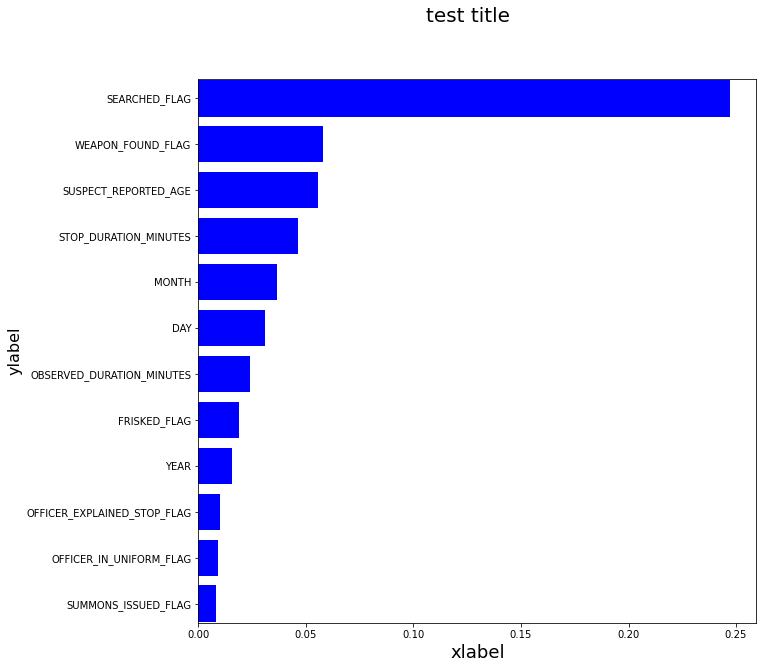

In [154]:
features = sorted(zip(X_train.columns[:12], clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.suptitle('test title', fontsize=20)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)

fig.set_size_inches(10, 10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width, color='b')
plt.savefig('../images/arrest_reduced_feature.PNG')
plt.show()

In [155]:
features

[('SUMMONS_ISSUED_FLAG', 0.008335375756154482),
 ('OFFICER_IN_UNIFORM_FLAG', 0.009300056111982095),
 ('OFFICER_EXPLAINED_STOP_FLAG', 0.009949618746671864),
 ('YEAR', 0.015381525086838727),
 ('FRISKED_FLAG', 0.018994434181335708),
 ('OBSERVED_DURATION_MINUTES', 0.024099528868221077),
 ('DAY', 0.030942759140595216),
 ('MONTH', 0.03671217084963943),
 ('STOP_DURATION_MINUTES', 0.04613665453641903),
 ('SUSPECT_REPORTED_AGE', 0.05550598907254663),
 ('WEAPON_FOUND_FLAG', 0.05781528580656291),
 ('SEARCHED_FLAG', 0.24713679151384832)]

In [156]:
cols

['SUMMONS_ISSUED_FLAG',
 'OFFICER_IN_UNIFORM_FLAG',
 'OFFICER_EXPLAINED_STOP_FLAG',
 'YEAR',
 'FRISKED_FLAG',
 'OBSERVED_DURATION_MINUTES',
 'DAY',
 'MONTH',
 'STOP_DURATION_MINUTES',
 'SUSPECT_REPORTED_AGE',
 'WEAPON_FOUND_FLAG',
 'SEARCHED_FLAG']

In [157]:
width

[0.008335375756154482,
 0.009300056111982095,
 0.009949618746671864,
 0.015381525086838727,
 0.018994434181335708,
 0.024099528868221077,
 0.030942759140595216,
 0.03671217084963943,
 0.04613665453641903,
 0.05550598907254663,
 0.05781528580656291,
 0.24713679151384832]

In [158]:
selected_cols = [f[0] for f in features][-12:]
selected_cols

['SUMMONS_ISSUED_FLAG',
 'OFFICER_IN_UNIFORM_FLAG',
 'OFFICER_EXPLAINED_STOP_FLAG',
 'YEAR',
 'FRISKED_FLAG',
 'OBSERVED_DURATION_MINUTES',
 'DAY',
 'MONTH',
 'STOP_DURATION_MINUTES',
 'SUSPECT_REPORTED_AGE',
 'WEAPON_FOUND_FLAG',
 'SEARCHED_FLAG']

In [159]:
import joblib
joblib.dump(clf, 'reduced_features_random_forest_arrest.joblib')

['reduced_features_random_forest_arrest.joblib']